In [49]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_project_root(project_name: str = "extrema_lab"):
    cwd = os.getcwd()
    path_parts = cwd.split(os.sep)

    for i in range(len(path_parts), 0, -1):
        potential_root = os.sep.join(path_parts[:i])
        if os.path.basename(potential_root) == project_name:
            root = os.path.dirname(potential_root)
            if root not in sys.path:
                sys.path.append(root)
            print(f"added sys.path: {root}")
            return

    print(f"failed to fund {project_name}")


add_project_root("extrema_lab")
from extrema_lab.feature_eng.operator.utils_tools import *

added sys.path: C:\quant\work


In [79]:
symbol = "OPUSDT"
threshold = 0.0067
feat_cal_window = 150
feat_norm_window = 150
feat_norm_rolling_mean_window = 150

origin_df = process_single_symbol(
    symbol,
    str(threshold),
    feat_cal_window,
    feat_norm_window,
    feat_norm_rolling_mean_window,
)


In [88]:
import polars as pl

def to_metric_value_df(df: pl.DataFrame, agg: str = "mean") -> pl.DataFrame:
    """
    ÊääÂéüÂßã df ÁöÑÂàóÂêçÂíåËÅöÂêàÁªüËÆ°ÂÄºËΩ¨Êàê (metric, value) ‰∏§Âàó
    ÈªòËÆ§Áî® meanÔºå‰Ω†‰πüÂèØ‰ª•‰º† 'std'„ÄÅ'max' Á≠â
    """
    # ÂÖàÂÅöËÅöÂêàÔºåÂæóÂà∞‰∏ÄË°å
    if agg == "mean":
        row = df.mean()
    elif agg == "std":
        row = df.std()
    elif agg == "max":
        row = df.max()
    elif agg == "min":
        row = df.min()
    else:
        raise ValueError(f"Unsupported agg: {agg}")

    return pl.DataFrame({
        "metric": row.columns,
        "value": row.row(0)  # ÂèñËøô‰∏ÄË°åÁöÑÂÄº
    })

def summarize_metrics(df: pl.DataFrame) -> dict:
    """
    ÂØπËæìÂÖ•ÁöÑ DataFrame ÊåâÂàóÂêçËßÑÂàôËøõË°åÊ±áÊÄª:
    - z ÂºÄÂ§¥ vs Èùû z ÂºÄÂ§¥
    - zscaled ÁªìÂ∞æ vs Èùû zscaled ÁªìÂ∞æ
    """
    summary = {}
    columns = df["metric"].to_list()
    values = df["value"].to_list()

    data = dict(zip(columns, values))

    # ÂÆö‰πâÂàÜÁ±ªËßÑÂàô
    z_prefix = {k: v for k, v in data.items() if k.startswith("z_")}
    non_z_prefix = {k: v for k, v in data.items() if not k.startswith("z_")}
    zscaled_suffix = {k: v for k, v in data.items() if k.endswith("_zscaled")}
    non_zscaled_suffix = {k: v for k, v in data.items() if not k.endswith("_zscaled")}

    def stats(group: dict):
        if not group:
            return {"count": 0}
        vals = list(group.values())
        return {
            "count": len(vals),
            "mean": float(sum(vals) / len(vals)),
            "min": float(min(vals)),
            "max": float(max(vals)),
        }

    summary["z_prefix"] = stats(z_prefix)
    summary["non_z_prefix"] = stats(non_z_prefix)
    summary["zscaled_suffix"] = stats(zscaled_suffix)
    summary["non_zscaled_suffix"] = stats(non_zscaled_suffix)

    return summary



In [89]:
origin_metrics = to_metric_value_df(origin_df)
result = summarize_metrics(origin_metrics)
print(result)
# [2025-09-04 11:44:25,386] LogicLayer | INFO | Â∏ÅÁßçÊùÉÈáç: {'AAVEUSDT': np.float32(0.027509606), 'ADAUSDT': np.float32(-0.0014977796), 'ALGOUSDT': np.float32(0.002429692), 'APTUSDT': np.float32(0.14286211), 'ATOMUSDT': np.float32(0.0005415879), 'AVAXUSDT': np.float32(-0.0027356886), 'BCHUSDT': np.float32(0.0059073977), 'BNBUSDT': np.float32(-0.0659289), 'BTCUSDT': np.float32(-0.008985248), 'DOTUSDT': np.float32(-0.0022932636), 'EGLDUSDT': np.float32(-0.00067995343), 'ENSUSDT': np.float32(0.0065865996), 'ETCUSDT': np.float32(-0.0012505808), 'ETHUSDT': np.float32(0.009593688), 'FILUSDT': np.float32(-0.035134453), 'GMTUSDT': np.float32(-0.016431142), 'LINKUSDT': np.float32(0.14286211), 'LTCUSDT': np.float32(-0.009051655), 'MANAUSDT': np.float32(-0.016131451), 'NEARUSDT': np.float32(-0.0659289), 'OPUSDT': np.float32(0.14286211), 'RUNEUSDT': np.float32(-0.0023091289), 'SANDUSDT': np.float32(-0.0659289), 'SOLUSDT': np.float32(-0.0659289), 'SUIUSDT': np.float32(-0.0659289), 'THETAUSDT': np.float32(-0.0659289), 'TRXUSDT': np.float32(-0.0041890694), 'UNIUSDT': np.float32(-0.0037371784), 'XLMUSDT': np.float32(0.00846213), 'XRPUSDT': np.float32(0.0103829475)}
# [2025-09-04 11:44:25,386] LogicLayer | INFO | È¢ÑÊµãÂÄº (symbol ‚Üí pred): AAVEUSDT: 0.077024 | ADAUSDT: -0.009087 | ALGOUSDT: 0.006803 | APTUSDT: 0.908783 | ATOMUSDT: 0.001516 | AVAXUSDT: -0.016598 | BCHUSDT: 0.016540 | BNBUSDT: -10.083578 | BTCUSDT: -0.054515 | DOTUSDT: -0.013914 | EGLDUSDT: -0.004125 | ENSUSDT: 0.018442 | ETCUSDT: -0.007587 | ETHUSDT: 0.026861 | FILUSDT: -0.213166 | GMTUSDT: -0.099690 | LINKUSDT: 0.630511 | LTCUSDT: -0.054918 | MANAUSDT: -0.097872 | NEARUSDT: -0.701551 | OPUSDT: 1.347289 | RUNEUSDT: -0.014010 | SANDUSDT: -0.748300 | SOLUSDT: -0.655209 | SUIUSDT: -2.978549 | THETAUSDT: -1.230222 | TRXUSDT: -0.025416 | UNIUSDT: -0.022674 | XLMUSDT: 0.023693 | XRPUSDT: 0.029071

{'z_prefix': {'count': 120, 'mean': 0.007986568361548752, 'min': -0.19005612476792536, 'max': 0.1900561247835284}, 'non_z_prefix': {'count': 149, 'mean': 11686236411943.623, 'min': -8330220.970892409, 'max': 1741248088954652.2}, 'zscaled_suffix': {'count': 133, 'mean': -0.0044754884965965205, 'min': -0.13282127717298386, 'max': 0.10161452818076684}, 'non_zscaled_suffix': {'count': 136, 'mean': 12803303127791.176, 'min': -8330220.970892409, 'max': 1741248088954652.2}}


In [51]:
origin_df

shape: (14_035, 269)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ timestamp  ‚îÜ px      ‚îÜ sum_buy_s ‚îÜ sum_sell_ ‚îÜ ‚Ä¶ ‚îÜ px_dd_rb_ ‚îÜ micro_tre ‚îÜ z_px_dd_r ‚îÜ z_micro_t ‚îÇ
‚îÇ ---        ‚îÜ ---     ‚îÜ z         ‚îÜ sz        ‚îÜ   ‚îÜ zscaled   ‚îÜ nd_factor ‚îÜ b_zscaled ‚îÜ rend_fact ‚îÇ
‚îÇ i64        ‚îÜ f64     ‚îÜ ---       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ _150_zsca ‚îÜ ---       ‚îÜ or_150_zs ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ f64       ‚îÜ f64       ‚îÜ   ‚îÜ f64       ‚îÜ led       ‚îÜ f64       ‚îÜ cal‚Ä¶      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ ---       ‚îÜ           ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ           ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1719796327 ‚îÜ 3482.94 ‚îÜ 38834.506 ‚îÜ 25237.172 ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÇ
‚îÇ 045000     ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1719797606 ‚îÜ 3506.28 ‚îÜ 64704.413 ‚îÜ 59558.72  ‚îÜ ‚Ä¶ ‚îÜ 0.30443   ‚îÜ 0.0       ‚îÜ 0.30443   ‚îÜ 0.0       ‚îÇ
‚îÇ 385000     ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1719822615 ‚îÜ 3482.78 ‚îÜ 227139.05 ‚îÜ 233676.48 ‚îÜ ‚Ä¶ ‚îÜ 0.475161  ‚îÜ 0.0       ‚îÜ 0.474084  ‚îÜ 0.0       ‚îÇ
‚îÇ 163000     ‚îÜ         ‚îÜ 9         ‚îÜ 8         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1719833816 ‚îÜ 3459.44 ‚îÜ 91697.526 ‚îÜ 99951.305 ‚îÜ ‚Ä¶ ‚îÜ 0.457673  ‚îÜ 0.0       ‚îÜ 0.205923  ‚îÜ 0.0       ‚îÇ
‚îÇ 043000     ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1719855394 ‚îÜ 3482.62 ‚îÜ 220903.45 ‚îÜ 201478.45 ‚îÜ ‚Ä¶ ‚îÜ 0.266007  ‚îÜ 0.0       ‚îÜ -0.017872 ‚îÜ 0.0       ‚îÇ
‚îÇ 030000     ‚îÜ         ‚îÜ 6         ‚îÜ 6         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ ‚Ä¶          ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 1756601770 ‚îÜ 4460.5  ‚îÜ 59263.088 ‚îÜ 50601.298 ‚îÜ ‚Ä¶ ‚îÜ -0.222735 ‚îÜ 0.223804  ‚îÜ -0.423686 ‚îÜ 0.130908  ‚îÇ
‚îÇ 798000     ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1756645162 ‚îÜ 4490.39 ‚îÜ 724975.31 ‚îÜ 753658.73 ‚îÜ ‚Ä¶ ‚îÜ -0.235972 ‚îÜ 0.222499  ‚îÜ -0.436637 ‚îÜ 0.129472  ‚îÇ
‚îÇ 731000     ‚îÜ         ‚îÜ 9001      ‚îÜ 0001      ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1756649038 ‚îÜ 4460.3  ‚îÜ 85077.851 ‚îÜ 98171.412 ‚îÜ ‚Ä¶ ‚îÜ -0.249112 ‚îÜ 0.221194  ‚îÜ -0.449296 ‚îÜ 0.128045  ‚îÇ
‚îÇ 027000     ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1756681379 ‚îÜ 4430.41 ‚îÜ 455696.42 ‚îÜ 444289.99 ‚îÜ ‚Ä¶ ‚îÜ -0.262238 ‚îÜ 0.219889  ‚îÜ -0.461796 ‚îÜ 0.126628  ‚îÇ
‚îÇ 698000     ‚îÜ         ‚îÜ           ‚îÜ 5         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1756682531 ‚îÜ 4400.72 ‚îÜ 39289.564 ‚îÜ 73121.041 ‚îÜ ‚Ä¶ ‚îÜ -0.275312 ‚îÜ 0.218584  ‚îÜ -0.474055 ‚îÜ 0.125219  ‚îÇ
‚îÇ 589000     ‚îÜ         ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

In [52]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.mixture import GaussianMixture
from sklearn.utils.class_weight import compute_sample_weight

import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer
from sklearn.preprocessing import LabelEncoder
import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_last_n_rows_with_px_regression(
    y_true,           # ÁúüÂÆûÊú™Êù•Êî∂ÁõäÁéá
    y_pred,           # Ê®°ÂûãÈ¢ÑÊµãÊî∂ÁõäÁéá
    px,               # ‰ª∑Ê†º
    std_array=None,   # ÂèØÈÄâÊ†áÂáÜÂ∑Æ
    n=700,
    m=-1,
    alpha=1.0
):
    # Êà™ÂèñÊúÄËøë n Ë°å
    y_true_slice = y_true[n:m]
    y_pred_slice = y_pred[n:m]
    px_slice = px[n:m]
    std_slice = std_array[n:m] if std_array is not None else None

    time_index = np.arange(len(y_true_slice))

    fig, ax1 = plt.subplots(figsize=(16, 7))

    # ‰ª∑Ê†ºÁ∫ø
    ax1.plot(time_index, px_slice, color='tab:gray', label='Price (px)', linewidth=1.5)
    if std_slice is not None:
        ax1.plot(time_index, px_slice + alpha * std_slice, linestyle=':', color='gray', alpha=0.4, label='+std')
        ax1.plot(time_index, px_slice - alpha * std_slice, linestyle=':', color='gray', alpha=0.4, label='-std')

    ax1.set_ylabel("Price")
    ax1.set_xlabel("Time Index")
    ax1.tick_params(axis='y', labelcolor='black')

    # ÂàõÂª∫Á¨¨‰∫å‰∏™ y ËΩ¥ÔºöÊî∂ÁõäÁéá
    ax2 = ax1.twinx()
    ax2.plot(time_index, y_true_slice, label='True Future Return', color='tab:blue', linewidth=1.5)
    ax2.plot(time_index, y_pred_slice, label='Predicted Return', color='tab:green', linestyle='--', linewidth=1.5)
    ax2.set_ylabel("Return")
    ax2.tick_params(axis='y', labelcolor='black')

    # Âõæ‰æã
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title(f"Price, True Return, and Predicted Return (Last {n} rows)")
    plt.tight_layout()
    plt.show()


In [54]:
import polars as pl
import numpy as np
from tqdm import tqdm

future_window = 75 # ÊîπÊàêÈ¢ÑÊµãÊú™Êù•150Ê≠•ÁöÑÊî∂ÁõäÁéá

# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÊúâ‰∫Ü origin_df
px_np = origin_df["px"].to_numpy()

def future_return(px: np.ndarray, window: int, use_log_return: bool = False) -> np.ndarray:
    n = len(px)
    returns = np.full(n, np.nan)

    for i in tqdm(range(n - window), desc="Calculating future returns"):
        if use_log_return:
            returns[i] = np.log(px[i + window] / px[i]) if px[i] > 0 else np.nan
        else:
            returns[i] = (px[i + window] - px[i]) / px[i] if px[i] > 0 else np.nan

    return returns

# ËÆ°ÁÆóÊú™Êù•Êî∂ÁõäÁéáÊ†áÁ≠æ
future_return_label = future_return(px_np, future_window, use_log_return=True)

# Âä†ÂÖ• DataFrame
a_df = origin_df.with_columns([
    pl.Series("future_return", future_return_label)
])

# ÂéªÈô§ NaN
a_df_filtered = a_df.filter(pl.col("future_return").is_not_null())
a_df_filtered = clean_df_drop_nulls(a_df_filtered)

# ÂèØÈÄâÔºöÊåâÂë®ÂàÜÂâ≤
split_dataframes = split_df_by_month(a_df_filtered)
print("num split dfs: ", len(split_dataframes))

Calculating future returns: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13960/13960 [00:00<00:00, 1155337.09it/s]


Converted Polars DataFrame to Pandas
Null counts per column:
future_return    75
dtype: int64
Dropping columns with nulls greater than 500000: []
Shape after dropping columns: (14035, 270)
Shape after dropping rows with nulls: (13960, 270)
num split dfs:  14


In [55]:
import os
import json
import pickle
from pathlib import Path
from datetime import datetime

def save_tabnet_checkpoint(
    model,
    symbol,
    base_save_dir: str,
    model_params: dict,
    feature_names: list[str],
    training_meta: dict,
    unique_id: str = None, 
):
    if unique_id is None:
        timestamp = str(datetime.now().strftime("%Y-%m-%d_%H-%M"))
        save_dir = os.path.join(base_save_dir, f"{symbol}_{timestamp}")
    else:
        save_dir = os.path.join(base_save_dir, f"{symbol}_{unique_id}")

    os.makedirs(save_dir, exist_ok=True)

    model_path = os.path.join(save_dir, "tabnet_model")
    model.save_model(model_path)

    config_path = os.path.join(save_dir, "model_metadata.json")
    with open(config_path, "w") as f:
        json.dump({
            "model_params": model_params,
            "meta_info": training_meta,
        }, f, indent=4)

    aux_path = os.path.join(save_dir, "auxiliary.pkl")
    with open(aux_path, "wb") as f:
        pickle.dump({
            "feature_names": feature_names,
        }, f)

    print(f"model and meta info saved to {save_dir}")


In [56]:
n_train_terms = 6 # ÂèØÈÖçÁΩÆ
n_val_terms = 1    # ‰∏ÄËà¨ 1 Âë®È™åËØÅ
n_test_terms = 1   # Âêé 1 Âë®ÂÅö test

exclude_prefixes = ['timestamp', 'timestamp_dt', 'symbol']
target_col = "future_return"
feature_cols = [
    col for col in origin_df.columns
    if (col.endswith("_zscaled") and col.startswith("z_"))
        and all(not col.startswith(prefix) for prefix in exclude_prefixes)
        and not col.startswith("future_return_")
        and col != "px"
]
# print(feature_cols)
print(len(feature_cols))
# feature_cols = ["oi_di_long_term"]
results = []
all_tab_inc_test_predictions = []
all_tabnet_test_predictions = []
all_lgb_test_predictions = []

lgb_model = None
tab_inc = None
tab_inc_flag = 0

overall_start = None
overall_end = None

ic_lst = []
for i in range(len(split_dataframes) - n_train_terms - n_val_terms + 1):
    train_dfs = split_dataframes[i : i + n_train_terms]
    val_dfs = split_dataframes[i + n_train_terms : i + n_train_terms + n_val_terms]
    
    train_df = pl.concat(train_dfs)
    val_df = pl.concat(val_dfs)

    print("=" * 60)
    print(f"Fold {i}: Train {i}~{i+n_train_terms-1}, Val {i+n_train_terms}")
    print("Train:", train_df['timestamp_dt'][0], "to", train_df['timestamp_dt'][-1])
    print("Val:", val_df['timestamp_dt'][0], "to", val_df['timestamp_dt'][-1])

    fold_start = train_df['timestamp_dt'][0]
    fold_end = val_df['timestamp_dt'][-1]

    # Êõ¥Êñ∞ overall_start Âíå overall_end
    if overall_start is None or fold_start < overall_start:
        overall_start = fold_start
    if overall_end is None or fold_end > overall_end:
        overall_end = fold_end
        
    # Â§ÑÁêÜ train
    train_df_processed = train_df.sort('timestamp').drop_nulls(subset=feature_cols + [target_col, 'px']).to_pandas()
    X_train = train_df_processed[feature_cols]
    y_train = train_df_processed[target_col]
    px_train = train_df_processed['px']
    
    # Â§ÑÁêÜ val
    val_df_processed = val_df.sort('timestamp').drop_nulls(subset=feature_cols + [target_col, 'px']).to_pandas()
    X_val = val_df_processed[feature_cols]
    y_val = val_df_processed[target_col]
    px_val = val_df_processed['px']
    timestamps_val = val_df_processed['timestamp'] # Êî∂ÈõÜÊó∂Èó¥Êà≥

    # modellllllll
    up_thresh = 0.2
    lower_thresh = 0.8

    # sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # # # #LGBM
    # lgb_model = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.001, max_depth=4, verbose=-1)
    # early_stopping_callback = lgb.early_stopping(
    #     stopping_rounds=500,  # ËÄêÂøÉÂÄºÔºöÂ¶ÇÊûúÈ™åËØÅÈõÜÊÄßËÉΩÂú®ËøûÁª≠100ËΩÆÂÜÖÊ≤°ÊúâÊèêÂçáÔºåÂ∞±ÂÅúÊ≠¢ËÆ≠ÁªÉ
    #     verbose=True,          # ÊâìÂç∞Êó©ÂÅú‰ø°ÊÅØÔºå‰æãÂ¶ÇÂú®Á¨¨Â§öÂ∞ëËΩÆÂÅúÊ≠¢ÔºåÊúÄ‰Ω≥ÂàÜÊï∞ÊòØÂ§öÂ∞ë
    # )
    # lgb_model.fit(
    #     X_train, y_train,
    #     sample_weight=sample_weights,  # ‚úÖ Ê∑ªÂä† sample_weight
    #     eval_set=[(X_val, y_val)],
    #     eval_metric='acc',
    #     # callbacks=[early_stopping_callback], # Â∞ÜÊó©ÂÅúÂõûË∞É‰º†ÂÖ• callbacks ÂèÇÊï∞
    # )
    
    # lgb_eval = evaluate_with_confidence(
    #     y_true=y_val,
    #     y_pred_proba=lgb_model.predict_proba(X_val)[:, 1],
    #     model_name="lgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # # plot_last_n_rows_with_px(y_val, y_val, lgb_model.predict_proba(X_val)[:, 1], px_val, std_array=std_val, n=1, m=-1, alpha=alpha)
    
    # lgb_eval = evaluate_with_confidence(
    #     y_true=y_test,
    #     y_pred_proba=lgb_model.predict_proba(X_test)[:, 1],
    #     model_name="lgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(lgb_model.predict_proba(X_test)[:, 1], y_test, lgb_model.predict_proba(X_test)[:, 1], px_test, std_array=std_test, n=1, m=-1, alpha=alpha)
    # lgb_test_pred_probs = lgb_model.predict_proba(X_test)[:, 1]

    # current_window_results = pd.DataFrame({
    #     'timestamp': timestamps_test,
    #     'symbol': "BTCUSDT", # Â¶ÇÊûúÊúâÂ§ö‰∏™ËÇ°Á•®ÔºåÊî∂ÈõÜ symbol ÊòØÂøÖË¶ÅÁöÑ
    #     'true_label': y_test,
    #     'predicted_prob': lgb_test_pred_probs,
    #     'px': px_test, # Êî∂ÈõÜ‰ª∑Ê†ºÔºåÂõûÊµãÊó∂ÈúÄË¶Å
    #     'rolling_std': std_test # Êî∂ÈõÜÊ≥¢Âä®ÁéáÔºåÂèØËÉΩÁî®‰∫éÁ≠ñÁï•ÊàñÂàÜÊûê
    #     # Ê∑ªÂä†‰ªª‰Ωï‰Ω†ÂõûÊµãÈúÄË¶ÅÁöÑÂÖ∂‰ªñÊï∞ÊçÆ
    # })
    # all_lgb_test_predictions.append(current_window_results)

    # # CAT
    # cat_model = CatBoostClassifier(iterations=2000, learning_rate=0.005, depth=9, verbose=0)
    # cat_model.fit(
    #     X_train, y_train_bin,
    # )

    # cat_eval = evaluate_with_confidence(
    #     y_true=y_val_bin,
    #     y_pred_proba=cat_model.predict_proba(X_val)[:, 1],
    #     model_name="cat_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_val, y_val_bin, cat_model.predict_proba(X_val)[:, 1], px_val, n=6199)
    
    # cat_eval = evaluate_with_confidence(
    #     y_true=y_test_bin,
    #     y_pred_proba=cat_model.predict_proba(X_test)[:, 1],
    #     model_name="cat_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_test, y_test_bin, cat_model.predict_proba(X_test)[:, 1], px_test, n=6199)

    # # XGB
    # xgb_model = xgb.XGBClassifier(n_estimators=2000, learning_rate=0.005, max_depth=9, verbosity=0, use_label_encoder=False)
    # xgb_model.fit(
    #     X_train, y_train,
    # )

    # xgb_eval = evaluate_with_confidence(
    #     y_true=y_val,
    #     y_pred_proba=xgb_model.predict_proba(X_val)[:, 1],
    #     model_name="xgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_val, y_val, xgb_model.predict_proba(X_val)[:, 1], px_val, std_array=std_val, n=1, m=-1, alpha=alpha)
    

    # xgb_eval = evaluate_with_confidence(
    #     y_true=y_test,
    #     y_pred_proba=xgb_model.predict_proba(X_test)[:, 1],
    #     model_name="xgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_test, y_test, xgb_model.predict_proba(X_test)[:, 1], px_test, std_array=std_test, n=1, m=-1, alpha=alpha)

    params = {
        # Ê®°ÂûãÁªìÊûÑÂèÇÊï∞
        "n_d": 16,                      # ÂÜ≥Á≠ñËæìÂá∫Áª¥Â∫¶
        "n_a": 16,                      # Ê≥®ÊÑèÂäõÊú∫Âà∂Áª¥Â∫¶
        "n_steps": 3,                  # ÂÜ≥Á≠ñÊ≠•Êï∞
        "gamma": 1.3,                  # ÊéßÂà∂ÁâπÂæÅÂ§çÁî®ÁöÑÁ®ãÂ∫¶Ôºà>1Ôºâ
        "n_independent": 3,           # ÊØè‰∏™ step ÁöÑÁã¨Á´ã Feature Transformer Â±ÇÊï∞
        "n_shared":2,                # ÊØè‰∏™ step ÁöÑÂÖ±‰∫´ Feature Transformer Â±ÇÊï∞
    
        # ÂàÜÁ±ªÁâπÂæÅÂµåÂÖ•ÔºàÂ¶ÇÊûú‰Ω†Áî®ÁöÑÈÉΩÊòØ float ÁâπÂæÅÔºåÂèØ‰ª•ÂÖ®ÁïôÁ©∫Ôºâ
        "cat_idxs": [],               # Á±ªÂà´ÁâπÂæÅÁöÑÂàóÁ¥¢Âºï
        "cat_dims": [],               # ÊØè‰∏™Á±ªÂà´ÁâπÂæÅÁöÑÁ±ªÂà´Êï∞
        "cat_emb_dim": 1,             # Á±ªÂà´ÁâπÂæÅÁöÑÂµåÂÖ•Áª¥Â∫¶ÔºàÊàñ listÔºâ
    
        # Ê≠£ÂàôÂåñ‰∏éÊï∞ÂÄºÁ®≥ÂÆöÊÄß
        "lambda_sparse": 1e-5,        # Á®ÄÁñèÊ≠£Âàô
        "epsilon": 1e-15,             # sparsemax Á®≥ÂÆöÈ°π
        "momentum": 0.03,             # BatchNorm ÁöÑÂä®Èáè
        "clip_value": 3.0,            # Ê¢ØÂ∫¶Ë£ÅÂâ™
        
        # Ê≥®ÊÑèÂäõ mask Á±ªÂûã
        "mask_type": "sparsemax",     # sparsemax Êàñ entmax
    
        # ‰ºòÂåñÂô®ËÆæÁΩÆÔºàÂáΩÊï∞ÂíåÂèÇÊï∞Ôºâ
        # "optimizer_fn": torch.optim.Adam,    
        "optimizer_params": {"lr": 1e-2},
    
        # Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÔºàÂèØÈÄâÔºâ
        "scheduler_fn": None,         # torch.optim.lr_scheduler.StepLR Á≠â
        "scheduler_params": {},       # ÊØîÂ¶Ç {"step_size": 20, "gamma": 0.95}
    
        # È¢ÑËÆ≠ÁªÉËß£Á†ÅÂô®ÁªìÊûÑÔºà‰∏ÄËà¨Áî®‰∏çÂà∞Ôºâ
        "n_shared_decoder": 1,
        "n_indep_decoder": 1,
    
        # ËÆ≠ÁªÉÁéØÂ¢ÉÂíåË∞ÉËØï
        "seed": 7,
        "verbose": 20,
        "device_name": "cuda",        # auto / cpu / cuda
    }

    init_fit_params = {
        "max_epochs": 500,
        "patience": 75,
        "batch_size": 2048,
        "virtual_batch_size": 512,
    }

    inc_fit_params = {
        "max_epochs": 50,
        "patience": 10,
        "batch_size": 1024,
        "virtual_batch_size": 256,
        "warm_start": True,
    }

    # # Label Encode yÔºàÂ¶ÇÊûúÊòØ0/1Â∞±‰∏çÁî®Ôºâ
    # y_train_enc = y_train.astype(int)
    # y_val_enc = y_val.astype(int)
    
    # sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_enc)
    # print(sample_weights)
    
    # TabNet ËÆ≠ÁªÉ
    
    # tabnet = TabNetClassifier(**params)
    # tabnet.fit(
    #     X_train=X_train.values, y_train=y_train_enc,
    #     eval_set=[(X_val.values, y_val_enc)],
    #     weights=sample_weights,
    #     **init_fit_params,
    # )

    # # proba_smooth = softmax_with_temperature(proba_raw, temperature=1.5)
    
    # tabnet_eval = evaluate_with_confidence(
    #     y_true=y_val,
    #     y_pred_proba=tabnet.predict_proba(X_val.values)[:, 1],
    #     model_name="tabnet",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # # plot_last_n_rows_with_px(y_val, y_val, tabnet.predict_proba(X_val.values)[:, 1], px_val, std_array=std_val, n=1, m=-1, alpha=alpha)


    # tabnet_eval = evaluate_with_confidence(
    #     y_true=y_test,
    #     y_pred_proba=tabnet.predict_proba(X_test.values)[:, 1],
    #     model_name="tabnet",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )

    # plot_last_n_rows_with_px(y_test, y_test, tabnet.predict_proba(X_test.values)[:, 1], px_test, std_array=std_test, n=1, m=-1, alpha=alpha)

    # current_window_results = pd.DataFrame({
    #     'timestamp': timestamps_test,
    #     'symbol': "TST", # Â¶ÇÊûúÊúâÂ§ö‰∏™ËÇ°Á•®ÔºåÊî∂ÈõÜ symbol ÊòØÂøÖË¶ÅÁöÑ
    #     'true_label': y_test,
    #     'predicted_prob': tabnet.predict_proba(X_test.values)[:, 1],
    #     'px': px_test, # Êî∂ÈõÜ‰ª∑Ê†ºÔºåÂõûÊµãÊó∂ÈúÄË¶Å
    #     'rolling_std': std_test # Êî∂ÈõÜÊ≥¢Âä®ÁéáÔºåÂèØËÉΩÁî®‰∫éÁ≠ñÁï•ÊàñÂàÜÊûê
    #     # Ê∑ªÂä†‰ªª‰Ωï‰Ω†ÂõûÊµãÈúÄË¶ÅÁöÑÂÖ∂‰ªñÊï∞ÊçÆ
    # })
    # all_tabnet_test_predictions.append(current_window_results)

    # TabNet_incremental ËÆ≠ÁªÉ
    tabnet = TabNetRegressor(**params)
    tabnet.fit(
        X_train=X_train.values, 
        y_train=y_train.values.reshape(-1, 1),
        **init_fit_params,
    )

    y_val_pred = tabnet.predict(X_val.values)
    print("ÂõûÂΩíËØÑ‰º∞ (Val):")
    print("MSE:", mean_squared_error(y_val, y_val_pred))
    print("MAE:", mean_absolute_error(y_val, y_val_pred))
    print("R¬≤:", r2_score(y_val, y_val_pred))

    ic, _ = spearmanr(y_val, y_val_pred)
    print("IC (val):", ic)
    ic_lst.append(ic)
    # ÂèØÈÄâÔºöÂÆö‰πâÁΩÆ‰ø°Âå∫Èó¥ÔºàËøáÊª§ÊûÅÁ´ØÈ¢ÑÊµãÔºâ
    conf_thresh = 0.005  # ‰æãÂ¶ÇÔºöÂè™ÁúãÈ¢ÑÊµãÊî∂ÁõäÁéá > 0.5% Êàñ < -0.5%
    mask = (np.abs(y_val_pred) >= conf_thresh)
    print("ËøáÊª§È´òÁΩÆ‰ø°Â∫¶Ê†∑Êú¨Êï∞Èáè: ", mask.sum())
    
    # Êî∂ÈõÜÈ¢ÑÊµãÁªìÊûúÔºàVal ÂèØÈÄâÔºåTest Â∏∏Áî®‰∫éÂõûÊµãÔºâ
    current_window_results = pd.DataFrame({
        'timestamp': timestamps_val,  # Ê≥®ÊÑèÔºöÁî® test Êï∞ÊçÆ
        'symbol': symbol,
        'true_label': y_val,
        'predicted_value': y_val_pred.ravel(),  # ‰øùËØÅÊòØ‰∏ÄÁª¥
        'px': px_val,
    })
    
    all_tab_inc_test_predictions.append(current_window_results)

    week_results = {
        'train_period': f"{train_df['timestamp_dt'][0]} to {train_df['timestamp_dt'][-1]}",
        'val_period': f"{val_df['timestamp_dt'][0]} to {val_df['timestamp_dt'][-1]}",
        # 'LGBM': lgb_eval,
        # 'CatBoost': cat_model,
        # 'XGBoost': xgb_eval,
        # 'TabNet': tabnet_eval,
    }
    
    results.append(week_results)
    print(f"Test Week {i+n_train_terms} Evaluation Completed")
 
# Â≠òÂÇ®ËØ•Âë®ËØÑ‰º∞‰ø°ÊÅØ
term_results = {
    'train_period': f"{train_df['timestamp_dt'][0]} to {train_df['timestamp_dt'][-1]}",
    'val_period': f"{val_df['timestamp_dt'][0]} to {val_df['timestamp_dt'][-1]}",
    'TabNet_MSE': mean_squared_error(y_val, y_val_pred),
    'TabNet_MAE': mean_absolute_error(y_val, y_val_pred),
    'TabNet_R2': r2_score(y_val, y_val_pred),
    'HighConfidenceCount': int(mask.sum())
}
results.append(term_results)

print(f"Test Week {i + n_train_terms} Evaluation Completed")

# ÂêàÂπ∂ÊâÄÊúâÁ™óÂè£ÁöÑÈ¢ÑÊµãÁªìÊûú
final_predictions_df = pd.concat(all_tab_inc_test_predictions).sort_values('timestamp').reset_index(drop=True)

print("\n--- Final Predictions DataFrame for Backtesting ---")
print(final_predictions_df.head())
print(f"Total rows collected: {len(final_predictions_df)}")

# Â≠óÁ¨¶‰∏≤ÂåñÊï¥‰ΩìÊó∂Èó¥ËåÉÂõ¥
overall_start = str(overall_start)
overall_end = str(overall_end)
print(f"Êï¥‰ΩìËÆ≠ÁªÉÊó∂Èó¥ËåÉÂõ¥Ôºö{overall_start} Âà∞ {overall_end}")

60
Fold 0: Train 0~5, Val 6
Train: 2024-07-01 01:12:07.045000 to 2024-12-31 20:56:55.308000
Val: 2025-01-01 00:39:35.104000 to 2025-01-31 22:52:29.952000
epoch 0  | loss: 1.7146  |  0:00:00s


C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.01519 |  0:00:01s
epoch 40 | loss: 0.00504 |  0:00:03s
epoch 60 | loss: 0.00414 |  0:00:04s
epoch 80 | loss: 0.00316 |  0:00:06s
epoch 100| loss: 0.00247 |  0:00:07s
epoch 120| loss: 0.00229 |  0:00:08s
epoch 140| loss: 0.00193 |  0:00:10s
epoch 160| loss: 0.00163 |  0:00:12s
epoch 180| loss: 0.00155 |  0:00:13s
epoch 200| loss: 0.00168 |  0:00:14s
epoch 220| loss: 0.00145 |  0:00:16s
epoch 240| loss: 0.00132 |  0:00:17s
epoch 260| loss: 0.00119 |  0:00:19s
epoch 280| loss: 0.00119 |  0:00:20s
epoch 300| loss: 0.00115 |  0:00:22s
epoch 320| loss: 0.00103 |  0:00:23s
epoch 340| loss: 0.00089 |  0:00:25s
epoch 360| loss: 0.00096 |  0:00:26s
epoch 380| loss: 0.00084 |  0:00:28s
epoch 400| loss: 0.00094 |  0:00:29s
epoch 420| loss: 0.00084 |  0:00:31s
epoch 440| loss: 0.00094 |  0:00:32s
epoch 460| loss: 0.00079 |  0:00:34s
epoch 480| loss: 0.00064 |  0:00:35s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.005275119615761603
MAE: 0.058162499434474005
R¬≤: -0.925458467213303
IC (val): 0.1711

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.01293 |  0:00:01s
epoch 40 | loss: 0.00506 |  0:00:03s
epoch 60 | loss: 0.00316 |  0:00:04s
epoch 80 | loss: 0.00294 |  0:00:06s
epoch 100| loss: 0.00214 |  0:00:07s
epoch 120| loss: 0.00191 |  0:00:09s
epoch 140| loss: 0.00183 |  0:00:10s
epoch 160| loss: 0.00194 |  0:00:11s
epoch 180| loss: 0.00154 |  0:00:13s
epoch 200| loss: 0.00126 |  0:00:15s
epoch 220| loss: 0.00114 |  0:00:16s
epoch 240| loss: 0.0011  |  0:00:17s
epoch 260| loss: 0.00105 |  0:00:19s
epoch 280| loss: 0.00093 |  0:00:21s
epoch 300| loss: 0.00088 |  0:00:22s
epoch 320| loss: 0.00098 |  0:00:24s
epoch 340| loss: 0.00098 |  0:00:25s
epoch 360| loss: 0.00088 |  0:00:27s
epoch 380| loss: 0.00086 |  0:00:28s
epoch 400| loss: 0.00096 |  0:00:29s
epoch 420| loss: 0.00079 |  0:00:31s
epoch 440| loss: 0.00083 |  0:00:33s
epoch 460| loss: 0.00059 |  0:00:34s
epoch 480| loss: 0.00072 |  0:00:35s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.008233325645755867
MAE: 0.06917513281673071
R¬≤: -1.2503184245883117
IC (val): 0.1657

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.01341 |  0:00:01s
epoch 40 | loss: 0.0068  |  0:00:02s
epoch 60 | loss: 0.00458 |  0:00:04s
epoch 80 | loss: 0.00355 |  0:00:05s
epoch 100| loss: 0.00258 |  0:00:07s
epoch 120| loss: 0.00218 |  0:00:08s
epoch 140| loss: 0.00181 |  0:00:10s
epoch 160| loss: 0.00177 |  0:00:11s
epoch 180| loss: 0.00177 |  0:00:12s
epoch 200| loss: 0.00154 |  0:00:14s
epoch 220| loss: 0.00142 |  0:00:15s
epoch 240| loss: 0.00123 |  0:00:16s
epoch 260| loss: 0.00119 |  0:00:18s
epoch 280| loss: 0.00108 |  0:00:19s
epoch 300| loss: 0.00103 |  0:00:21s
epoch 320| loss: 0.0009  |  0:00:22s
epoch 340| loss: 0.00088 |  0:00:23s
epoch 360| loss: 0.00097 |  0:00:25s
epoch 380| loss: 0.00101 |  0:00:26s
epoch 400| loss: 0.00076 |  0:00:27s
epoch 420| loss: 0.00079 |  0:00:29s
epoch 440| loss: 0.00069 |  0:00:30s
epoch 460| loss: 0.00074 |  0:00:32s
epoch 480| loss: 0.00066 |  0:00:33s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.008688990353073285
MAE: 0.07276791485046578
R¬≤: -1.426601533297697
IC (val): -0.0368

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.00833 |  0:00:02s
epoch 40 | loss: 0.00428 |  0:00:04s
epoch 60 | loss: 0.00352 |  0:00:06s
epoch 80 | loss: 0.00252 |  0:00:08s
epoch 100| loss: 0.00232 |  0:00:10s
epoch 120| loss: 0.00195 |  0:00:12s
epoch 140| loss: 0.00155 |  0:00:14s
epoch 160| loss: 0.0014  |  0:00:17s
epoch 180| loss: 0.00141 |  0:00:19s
epoch 200| loss: 0.00121 |  0:00:21s
epoch 220| loss: 0.0011  |  0:00:23s
epoch 240| loss: 0.00102 |  0:00:25s
epoch 260| loss: 0.00088 |  0:00:27s
epoch 280| loss: 0.00096 |  0:00:29s
epoch 300| loss: 0.00096 |  0:00:31s
epoch 320| loss: 0.00083 |  0:00:33s
epoch 340| loss: 0.00075 |  0:00:35s
epoch 360| loss: 0.00074 |  0:00:38s
epoch 380| loss: 0.00069 |  0:00:40s
epoch 400| loss: 0.00061 |  0:00:42s
epoch 420| loss: 0.00068 |  0:00:44s
epoch 440| loss: 0.00069 |  0:00:46s
epoch 460| loss: 0.00064 |  0:00:48s
epoch 480| loss: 0.00056 |  0:00:50s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.005468564524708834
MAE: 0.058181687314648976
R¬≤: -0.4971246604497044
IC (val): 0.286

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.00831 |  0:00:02s
epoch 40 | loss: 0.00416 |  0:00:04s
epoch 60 | loss: 0.00275 |  0:00:06s
epoch 80 | loss: 0.00238 |  0:00:08s
epoch 100| loss: 0.00207 |  0:00:11s
epoch 120| loss: 0.00204 |  0:00:13s
epoch 140| loss: 0.00159 |  0:00:15s
epoch 160| loss: 0.00147 |  0:00:17s
epoch 180| loss: 0.00144 |  0:00:19s
epoch 200| loss: 0.00122 |  0:00:21s
epoch 220| loss: 0.00107 |  0:00:24s
epoch 240| loss: 0.00108 |  0:00:26s
epoch 260| loss: 0.00098 |  0:00:28s
epoch 280| loss: 0.00099 |  0:00:30s
epoch 300| loss: 0.0008  |  0:00:32s
epoch 320| loss: 0.00086 |  0:00:35s
epoch 340| loss: 0.00082 |  0:00:37s
epoch 360| loss: 0.00079 |  0:00:39s
epoch 380| loss: 0.00073 |  0:00:41s
epoch 400| loss: 0.0007  |  0:00:44s
epoch 420| loss: 0.00087 |  0:00:46s
epoch 440| loss: 0.00068 |  0:00:48s
epoch 460| loss: 0.00068 |  0:00:51s
epoch 480| loss: 0.00059 |  0:00:53s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.005937843725008746
MAE: 0.06157957286243847
R¬≤: -0.5695688256993119
IC (val): -0.018

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.00716 |  0:00:02s
epoch 40 | loss: 0.00424 |  0:00:04s
epoch 60 | loss: 0.00256 |  0:00:06s
epoch 80 | loss: 0.00227 |  0:00:09s
epoch 100| loss: 0.00202 |  0:00:11s
epoch 120| loss: 0.0017  |  0:00:13s
epoch 140| loss: 0.00154 |  0:00:15s
epoch 160| loss: 0.00135 |  0:00:17s
epoch 180| loss: 0.0012  |  0:00:19s
epoch 200| loss: 0.0012  |  0:00:21s
epoch 220| loss: 0.0011  |  0:00:24s
epoch 240| loss: 0.00096 |  0:00:26s
epoch 260| loss: 0.0009  |  0:00:28s
epoch 280| loss: 0.00094 |  0:00:30s
epoch 300| loss: 0.00082 |  0:00:32s
epoch 320| loss: 0.0008  |  0:00:34s
epoch 340| loss: 0.00084 |  0:00:37s
epoch 360| loss: 0.00074 |  0:00:39s
epoch 380| loss: 0.00074 |  0:00:41s
epoch 400| loss: 0.0007  |  0:00:43s
epoch 420| loss: 0.00067 |  0:00:46s
epoch 440| loss: 0.00065 |  0:00:48s
epoch 460| loss: 0.00059 |  0:00:50s
epoch 480| loss: 0.0006  |  0:00:52s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.007604257575193892
MAE: 0.06713083877296132
R¬≤: -0.7699668170880667
IC (val): -0.218

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.00869 |  0:00:02s
epoch 40 | loss: 0.00396 |  0:00:04s
epoch 60 | loss: 0.00315 |  0:00:06s
epoch 80 | loss: 0.00264 |  0:00:09s
epoch 100| loss: 0.00213 |  0:00:11s
epoch 120| loss: 0.00198 |  0:00:13s
epoch 140| loss: 0.00161 |  0:00:15s
epoch 160| loss: 0.00157 |  0:00:17s
epoch 180| loss: 0.00126 |  0:00:20s
epoch 200| loss: 0.00125 |  0:00:22s
epoch 220| loss: 0.00115 |  0:00:24s
epoch 240| loss: 0.00125 |  0:00:26s
epoch 260| loss: 0.00097 |  0:00:28s
epoch 280| loss: 0.00096 |  0:00:31s
epoch 300| loss: 0.00098 |  0:00:33s
epoch 320| loss: 0.00092 |  0:00:35s
epoch 340| loss: 0.00088 |  0:00:37s
epoch 360| loss: 0.0008  |  0:00:39s
epoch 380| loss: 0.00066 |  0:00:42s
epoch 400| loss: 0.00073 |  0:00:44s
epoch 420| loss: 0.00072 |  0:00:46s
epoch 440| loss: 0.00075 |  0:00:48s
epoch 460| loss: 0.00065 |  0:00:51s
epoch 480| loss: 0.00058 |  0:00:53s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.007736627457138992
MAE: 0.07051504366901629
R¬≤: -1.2710933492305823
IC (val): 0.0527

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 20 | loss: 0.00778 |  0:00:02s
epoch 40 | loss: 0.00438 |  0:00:04s
epoch 60 | loss: 0.00306 |  0:00:06s
epoch 80 | loss: 0.00251 |  0:00:08s
epoch 100| loss: 0.00201 |  0:00:11s
epoch 120| loss: 0.00172 |  0:00:13s
epoch 140| loss: 0.00161 |  0:00:15s
epoch 160| loss: 0.00144 |  0:00:17s
epoch 180| loss: 0.0014  |  0:00:20s
epoch 200| loss: 0.00129 |  0:00:22s
epoch 220| loss: 0.0011  |  0:00:24s
epoch 240| loss: 0.00106 |  0:00:26s
epoch 260| loss: 0.00101 |  0:00:28s
epoch 280| loss: 0.0009  |  0:00:31s
epoch 300| loss: 0.00084 |  0:00:33s
epoch 320| loss: 0.00094 |  0:00:35s
epoch 340| loss: 0.00074 |  0:00:37s
epoch 360| loss: 0.00078 |  0:00:40s
epoch 380| loss: 0.00069 |  0:00:42s
epoch 400| loss: 0.00073 |  0:00:44s
epoch 420| loss: 0.00067 |  0:00:46s
epoch 440| loss: 0.00062 |  0:00:49s
epoch 460| loss: 0.00062 |  0:00:51s
epoch 480| loss: 0.00071 |  0:00:53s
ÂõûÂΩíËØÑ‰º∞ (Val):
MSE: 0.009372489762686568
MAE: 0.08386582809421995
R¬≤: -1.184482700978943
IC (val): -0.1165

Mean IC: 0.0358, Std IC: 0.1667, IR: 0.2147


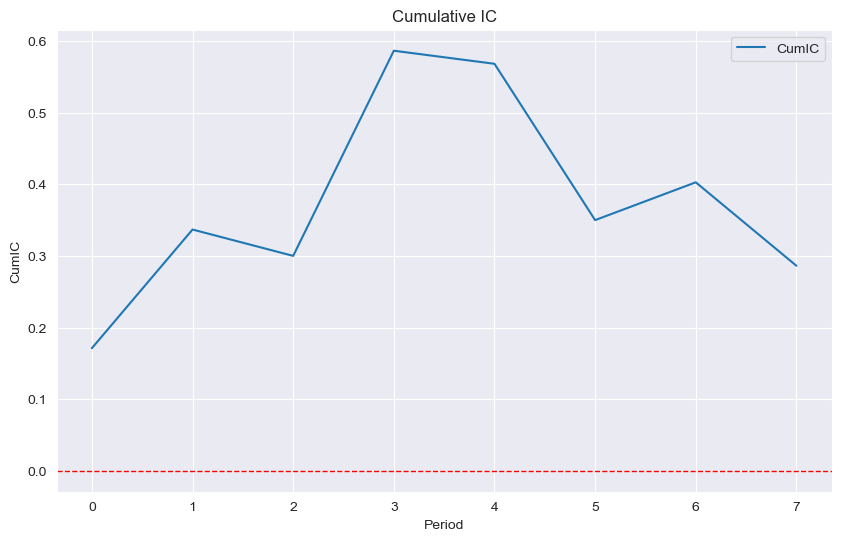

In [57]:

ic_arr = np.array(ic_lst)

mean_ic = np.mean(ic_arr)
std_ic = np.std(ic_arr, ddof=1)  # Ê†∑Êú¨Ê†áÂáÜÂ∑Æ
ir = mean_ic / std_ic if std_ic != 0 else np.nan

print(f"Mean IC: {mean_ic:.4f}, Std IC: {std_ic:.4f}, IR: {ir:.4f}")

cum_ic = np.cumsum(ic_arr)

plt.figure(figsize=(10, 6))
plt.plot(cum_ic, label="CumIC")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Cumulative IC")
plt.xlabel("Period")
plt.ylabel("CumIC")
plt.legend()
plt.show()

In [58]:
print(len(X_val.columns))

60


In [59]:
explain_matrix, masks = tabnet.explain(X_val.values)


Top 20 Features by Importance:

z_px_pct_rol_sum_40_zscaled              Importance: 0.760420
z_px_pct_rol_sum_150_zscaled             Importance: 0.589319
z_px_pct_rol_sum_20_zscaled              Importance: 0.343605
z_sum_sz_px_pct_rol_sum_150_zscaled      Importance: 0.202946
z_oi_up_divergence_short_term_zscaled    Importance: 0.193250
z_funding_oi_zscaled                     Importance: 0.176836
z_funding_oi_roll_mean_ratio_288_zscaled Importance: 0.126757
z_corr_px_oi_sum_open_interest_value_150_zscaled Importance: 0.123287
z_oi_sum_open_interest_zscaled           Importance: 0.118479
z_factor_impact_momentum_zscaled         Importance: 0.115932
z_premium_funding_spread_sum_288_zscaled Importance: 0.098434
z_oi_di_zscaled                          Importance: 0.076578
z_taker_px_pct_diff_zscaled              Importance: 0.074087
z_px_rebound_zscaled                     Importance: 0.072212
z_factor_order_momentum_divergence_zscaled Importance: 0.056796
z_px_oi_corr_activation_zsca

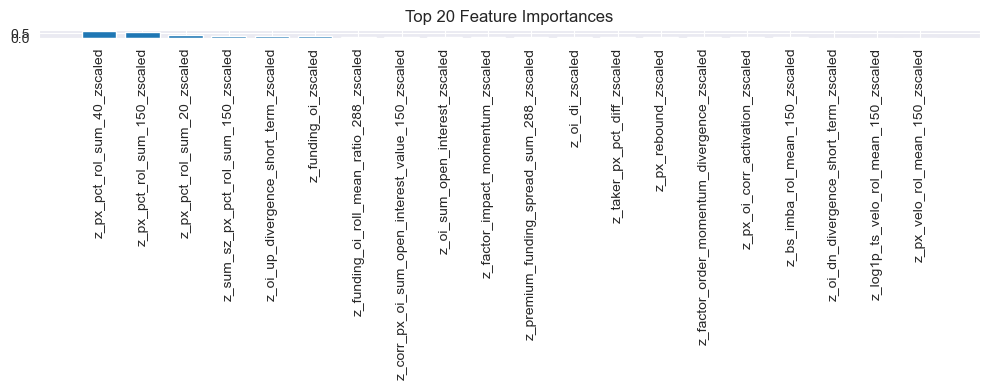

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# ÂÅáËÆæ explain_matrix ÊòØ TabNetClassifier ÁöÑËß£ÈáäÁü©Èòµ (n_samples, n_features)
mean_importance = np.mean(np.abs(explain_matrix), axis=0)
top_n = 20
top_indices = np.argsort(mean_importance)[::-1][:top_n]

# ÁâπÂæÅÂêç
top_feature_names = [X_train.columns[i] for i in top_indices]
top_importance_values = mean_importance[top_indices]

# ÊâìÂç∞ Top N ÁâπÂæÅÂêç + ÊùÉÈáç
print(f"Top {top_n} Features by Importance:\n")
for name, score in zip(top_feature_names, top_importance_values):
    print(f"{name:<40} Importance: {score:.6f}")

# ÁîªÂõæ
plt.figure(figsize=(10, 4))
plt.bar(range(top_n), top_importance_values)
plt.xticks(range(top_n), top_feature_names, rotation=90)
plt.title(f"Top {top_n} Feature Importances")
plt.tight_layout()
plt.show()


In [61]:
import numpy as np

mask_sample = masks[0][0]  # Á¨¨0Ê≠•ÔºåÁ¨¨0‰∏™Ê†∑Êú¨ÁöÑmask
nonzero_indices = np.nonzero(mask_sample)[0]  # ÊâæÈùûÈõ∂‰ΩçÁΩÆÁ¥¢Âºï

print("Ë¢´ÂÖ≥Ê≥®ÁöÑÁâπÂæÅÁ¥¢Âºï:", nonzero_indices)
print("ÂØπÂ∫îÁöÑÊùÉÈáç:", mask_sample[nonzero_indices])

# ÂÅáËÆæ‰Ω†ÁöÑÁâπÂæÅÂêçÂàóË°®ÊòØ feature_namesÔºàÈïøÂ∫¶460Ôºâ
for idx in nonzero_indices:
    print(f"ÁâπÂæÅ: {X_train.columns[idx]}, ÊùÉÈáç: {mask_sample[idx]:.4f}")


Ë¢´ÂÖ≥Ê≥®ÁöÑÁâπÂæÅÁ¥¢Âºï: [13 31 40 44]
ÂØπÂ∫îÁöÑÊùÉÈáç: [0.71984351 0.19555354 0.00555271 0.07905036]
ÁâπÂæÅ: z_premium_funding_spread_sum_288_zscaled, ÊùÉÈáç: 0.7198
ÁâπÂæÅ: z_log1p_sum_sz_150_rsi_150_zscaled, ÊùÉÈáç: 0.1956
ÁâπÂæÅ: z_sum_sz_px_pct_rol_sum_150_zscaled, ÊùÉÈáç: 0.0056
ÁâπÂæÅ: z_oi_di_long_term_zscaled, ÊùÉÈáç: 0.0791


In [62]:
import numpy as np
import pandas as pd

def show_tabnet_attention_masks(masks, feature_names, sample_idx=0, top_k=10):
    """
    ÊòæÁ§∫ TabNet ÂØπÊüê‰∏™Ê†∑Êú¨Âú®ÊØè‰∏ÄÊ≠•‰∏≠ÂÖ≥Ê≥®ÁöÑÁâπÂæÅÂèäÂÖ∂ÊùÉÈáç„ÄÇ

    ÂèÇÊï∞:
    - masks: tabnet.explain(X)[1] ËøîÂõûÁöÑÂ≠óÂÖ∏
    - feature_names: list[str]ÔºåÂØπÂ∫î X_train.columns
    - sample_idx: ÈÄâÂì™‰∏™Ê†∑Êú¨
    - top_k: ÊúÄÂ§öÂ±ïÁ§∫ÂâçÂ§öÂ∞ë‰∏™ÈùûÈõ∂ÁâπÂæÅ
    """
    for step, mask_array in masks.items():
        mask_sample = mask_array[sample_idx]  # shape = (num_features,)
        nonzero_indices = np.nonzero(mask_sample)[0]
        weights = mask_sample[nonzero_indices]
        
        # ÊåâÁÖßÊùÉÈáç‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è
        sorted_idx = np.argsort(-weights)
        top_indices = nonzero_indices[sorted_idx[:top_k]]
        
        print(f"\nüß≠ Step {step}ÔºàÂÖ±{len(nonzero_indices)}‰∏™ÈùûÈõ∂ÁâπÂæÅÔºâ:")
        for i in top_indices:
            print(f"  ÁâπÂæÅ: {feature_names[i]:<30} ÊùÉÈáç: {mask_sample[i]:.4f}")


In [63]:
# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÊúâ
# masks = tabnet.explain(X_test)[1]
# feature_names = list(X_test.columns)

show_tabnet_attention_masks(masks, X_train.columns, sample_idx=0, top_k=20)



üß≠ Step 0ÔºàÂÖ±4‰∏™ÈùûÈõ∂ÁâπÂæÅÔºâ:
  ÁâπÂæÅ: z_premium_funding_spread_sum_288_zscaled ÊùÉÈáç: 0.7198
  ÁâπÂæÅ: z_log1p_sum_sz_150_rsi_150_zscaled ÊùÉÈáç: 0.1956
  ÁâπÂæÅ: z_oi_di_long_term_zscaled      ÊùÉÈáç: 0.0791
  ÁâπÂæÅ: z_sum_sz_px_pct_rol_sum_150_zscaled ÊùÉÈáç: 0.0056

üß≠ Step 1ÔºàÂÖ±6‰∏™ÈùûÈõ∂ÁâπÂæÅÔºâ:
  ÁâπÂæÅ: z_corr_px_oi_sum_open_interest_value_150_zscaled ÊùÉÈáç: 0.2959
  ÁâπÂæÅ: z_funding_oi_zscaled           ÊùÉÈáç: 0.2563
  ÁâπÂæÅ: z_oi_sum_open_interest_zscaled ÊùÉÈáç: 0.2424
  ÁâπÂæÅ: z_factor_triplet_roll_mean_ratio_288_zscaled ÊùÉÈáç: 0.0721
  ÁâπÂæÅ: z_funding_oi_roll_mean_ratio_288_zscaled ÊùÉÈáç: 0.0693
  ÁâπÂæÅ: z_bs_imba_rol_mean_150_zscaled ÊùÉÈáç: 0.0640

üß≠ Step 2ÔºàÂÖ±9‰∏™ÈùûÈõ∂ÁâπÂæÅÔºâ:
  ÁâπÂæÅ: z_factor_order_momentum_divergence_zscaled ÊùÉÈáç: 0.3486
  ÁâπÂæÅ: z_oi_up_divergence_short_term_zscaled ÊùÉÈáç: 0.2266
  ÁâπÂæÅ: z_funding_oi_zscaled           ÊùÉÈáç: 0.2132
  ÁâπÂæÅ: z_funding_oi_roll_mean_ratio_288_zscaled ÊùÉÈáç: 0.0764
  ÁâπÂæÅ:

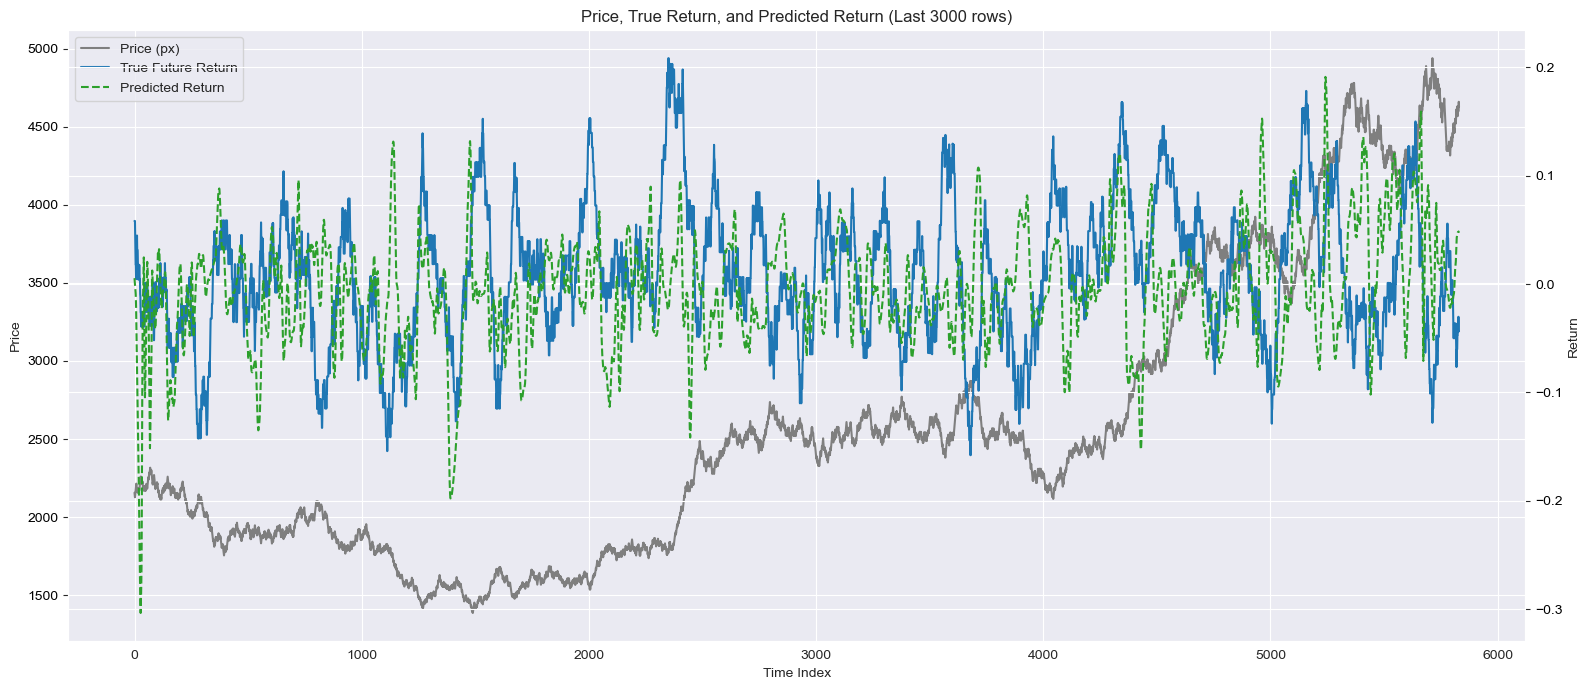

timestamp   symbol  true_label  predicted_value       px  \
0     1735691975104000  ETHUSDT    0.072669         0.074705  3358.94   
1     1735713391050000  ETHUSDT    0.072668         0.089416  3336.43   
2     1735723573940000  ETHUSDT    0.072667         0.099175  3314.07   
3     1735725779353000  ETHUSDT    0.059087         0.074477  3336.28   
4     1735740335927000  ETHUSDT    0.059086         0.066534  3358.64   
...                ...      ...         ...              ...      ...   
8827  1756303095040000  ETHUSDT   -0.030291         0.045732  4597.68   
8828  1756304913797000  ETHUSDT   -0.030291         0.051925  4628.49   
8829  1756305067210000  ETHUSDT   -0.043694         0.047110  4659.51   
8830  1756305898544000  ETHUSDT   -0.043695         0.055820  4628.29   
8831  1756320971039000  ETHUSDT   -0.043697         0.056087  4597.28   

      predicted_prob_rolling_mean  predicted_prob_rolling_mean_reverse  
0                        0.074705                             0.925295  
1                        0.082060                             0.917940  
2                        0.087765                             0.912235  
3                        0.084443                             0.915557  
4                        0.080861                             0.919139  
...                           ...                                  ...  
8827                     0.048047                             0.951953  
8828                     0.048443                             0.951557  
8829                     0.048207                             0.951793  
8830                     0.048757                             0.951243  
8831                     0.049298                             0.950702  

[8832 rows x 7 columns]

In [64]:
rolling_window_size = 10

final_predictions_df = pd.concat(all_tab_inc_test_predictions).sort_values('timestamp').reset_index(drop=True)

final_predictions_df['predicted_prob_rolling_mean'] = final_predictions_df['predicted_value'].rolling(window=rolling_window_size, min_periods=1).mean()
final_predictions_df['predicted_prob_rolling_mean_reverse'] = 1-final_predictions_df['predicted_prob_rolling_mean']

plot_last_n_rows_with_px_regression(
    y_true=final_predictions_df['true_label'],
    y_pred=final_predictions_df['predicted_prob_rolling_mean'],
    px=final_predictions_df['px'],
    n=3000,
    alpha=1.5
)

final_predictions_df

In [65]:
# ËÆ°ÁÆóÊú™Êù•Êî∂Áõä

final_predictions_df['future_return'] = (
    final_predictions_df['px'].shift(-future_window) / final_predictions_df['px'] - 1
)


from scipy.stats import spearmanr

signal_col = 'predicted_value'
return_col = 'future_return'

ic_df = final_predictions_df[[signal_col, return_col]].dropna()
rank_ic, p_value = spearmanr(ic_df[signal_col], ic_df[return_col])

print(f"Rank IC: {rank_ic:.4f}, p-value: {p_value:.4g}")


Rank IC: 0.0614, p-value: 8.675e-09


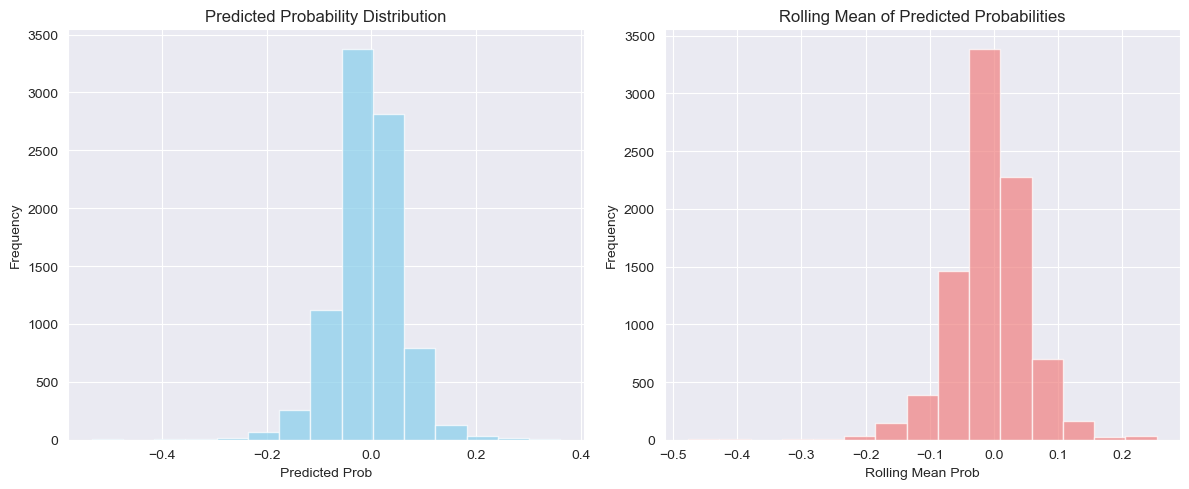

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# ÂéüÂßã predict_proba ÂàÜÂ∏É
plt.subplot(1, 2, 1)
plt.hist(final_predictions_df['predicted_value'][200:], bins=15, alpha=0.7, color='skyblue')
plt.title('Predicted Probability Distribution')
plt.xlabel('Predicted Prob')
plt.ylabel('Frequency')

# ÊªöÂä®ÂùáÂÄºÂàÜÂ∏É
plt.subplot(1, 2, 2)
plt.hist(final_predictions_df['predicted_prob_rolling_mean'][200:], bins=15, alpha=0.7, color='lightcoral')
plt.title('Rolling Mean of Predicted Probabilities')
plt.xlabel('Rolling Mean Prob')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


150
2025-01-01 09:26:13.940000: BUY_OPEN 27.12 @ 3316.39 (Prob: 0.0878) | Capital: 100000.00
2025-01-07 14:59:22.038000: SELL_CLOSE_LONG 27.12 @ 3536.87 | PnL: 5932.49 | Capital: 105932.49 | Reason: 
2025-01-07 21:01:59.811000: SELL_SHORT_OPEN -28.07 @ 3394.38 (Prob: -0.0864) | Capital: 105932.49
2025-01-10 02:01:35.277000: BUY_TO_COVER_SHORT 28.07 @ 3242.08 | PnL: 4230.18 | Capital: 110162.67 | Reason: 
2025-01-14 14:47:16.222000: BUY_OPEN 30.96 @ 3200.87 (Prob: 0.0951) | Capital: 110162.67
2025-01-17 16:18:52.184000: SELL_CLOSE_LONG 30.96 @ 3439.12 | PnL: 7322.89 | Capital: 117485.56 | Reason: 
2025-01-19 02:41:32.637000: BUY_OPEN 31.30 @ 3376.01 (Prob: 0.0875) | Capital: 117485.56
2025-01-19 21:29:02.064000: SELL_CLOSE_LONG 31.30 @ 3274.69 | PnL: -3223.19 | Capital: 114262.37 | Reason: 
2025-01-19 21:32:25.408000: SELL_SHORT_OPEN -31.39 @ 3274.12 (Prob: -0.0876) | Capital: 114262.37
2025-01-20 06:45:29.742000: BUY_TO_COVER_SHORT 31.39 @ 3368.76 | PnL: -3023.92 | Capital: 111238.44 |

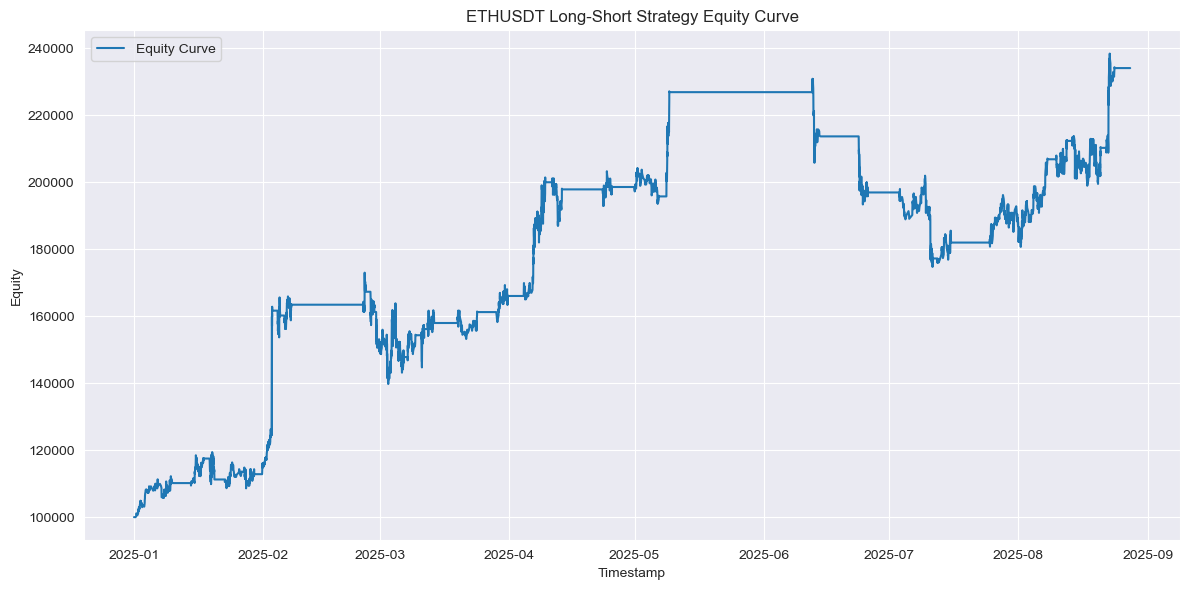

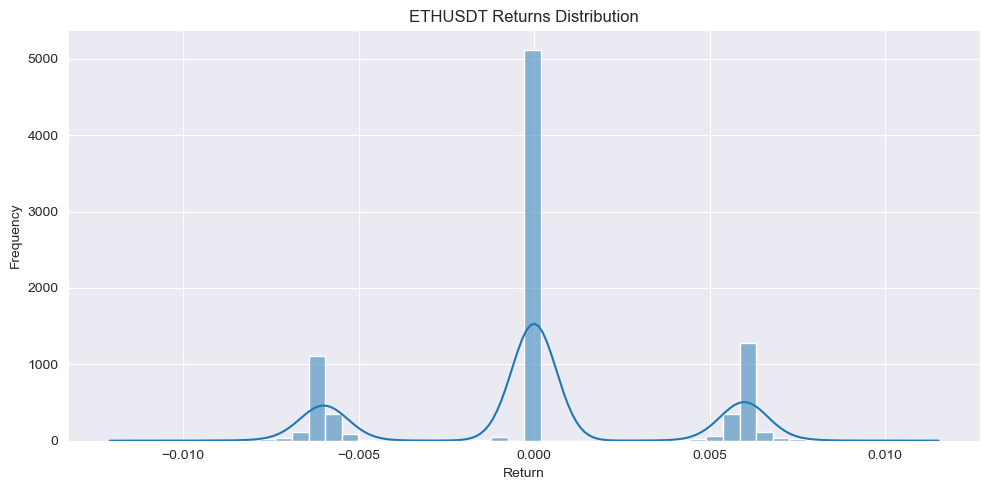

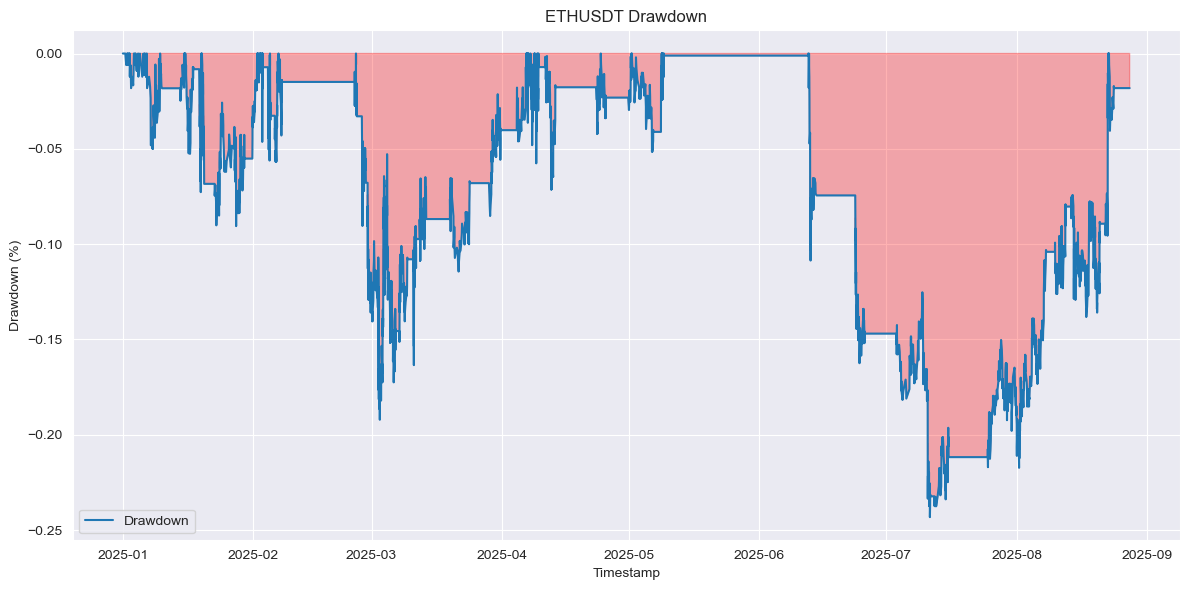

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

ma_window = int(feat_norm_rolling_mean_window)
print(ma_window)
# ma_window = 50

all_predictions_df = final_predictions_df
all_predictions_df['timestamp'] = pd.to_datetime(all_predictions_df['timestamp'], unit='us') # Assuming microseconds
all_predictions_df['ma'] = all_predictions_df['px'].rolling(window=ma_window).mean()

symbol_to_backtest = all_predictions_df['symbol'].iloc[0] # Take the first symbol for now
df = all_predictions_df[all_predictions_df['symbol'] == symbol_to_backtest].copy()
df = df.sort_values('timestamp').reset_index(drop=True)

# ===============================================
# Backtesting Parameters (Ratios for costs)
# ===============================================
initial_capital = 100000  # Initial capital
commission_ratio = 0.0005 # Commission ratio (e.0.05%)
slippage_ratio = 0.0007   # Slippage ratio (e.g., 0.02%)

trade_size_ratio = 0.9    # Percentage of current equity to allocate per trade

# Strategy Thresholds (needs optimization)
long_threshold = 0.085 # Predicted probability above this to go long (buy)
short_threshold = -0.085 # Predicted probability below this to go short (sell)

beta = 15
# Dynamic Take Profit / Stop Loss (in multiples of rolling_std/px)
long_stop_loss_multiplier = beta
long_take_profit_multiplier = beta
short_stop_loss_multiplier = beta
short_take_profit_multiplier = beta

# ===============================================
# Backtesting Main Logic (No change here from previous version)
# ===============================================

# Initialize account state
capital = initial_capital
position = 0          # Position size (positive for long, negative for short, 0 for flat)
entry_price = 0       # Entry price for current position
realized_pnl = 0      # Realized PnL from closed trades
equity_curve = [initial_capital] # Equity curve
unrealized_pnl_series = [0]

# Record trades
trades = []

step = 0

for i in range(len(df)):
    current_time = df['timestamp'].iloc[i]
    current_px = df['px'].iloc[i]
    predicted_prob = df['predicted_prob_rolling_mean'].iloc[i]
    ma = df['ma'].iloc[i]
    current_rolling_std = current_px * 0.01
    # Calculate current total equity (capital + market value of position)
    if position > 0: # Long position
        unrealized_pnl = (current_px - entry_price) * position
    elif position < 0: # Short position
        unrealized_pnl = (entry_price - current_px) * abs(position) # Profit when price falls
    else: # Flat
        unrealized_pnl = 0

    current_equity = capital + unrealized_pnl
    equity_curve.append(current_equity)
    unrealized_pnl_series.append(unrealized_pnl)

    # -----------------------------------------------
    # Strategy Execution - Long-Short
    # -----------------------------------------------

    # Scenario 1: Currently FLAT (position == 0)
    if position == 0:
        if predicted_prob >= long_threshold:# and current_px > ma: # Go Long Signal
            trade_type = 'BUY_OPEN'
            trade_price = current_px * (1 + slippage_ratio)
            num_shares = (current_equity * trade_size_ratio) / (trade_price * (1 + commission_ratio))

            if num_shares > 0:
                position = num_shares
                entry_price = trade_price
                # capital -= (position * entry_price * (1 + commission_ratio))

                trades.append({
                    'timestamp': current_time, 'type': trade_type, 'price': entry_price, 'shares': position,
                    'capital_after_trade': capital, 'equity_after_trade': current_equity, 'predicted_prob': predicted_prob
                })
                print(f"{current_time}: {trade_type} {position:.2f} @ {entry_price:.2f} (Prob: {predicted_prob:.4f}) | Capital: {capital:.2f}")

        elif predicted_prob <= short_threshold:# and current_px < ma: # Go Short Signal
            trade_type = 'SELL_SHORT_OPEN'
            trade_price = current_px * (1 - slippage_ratio) # Price for short is lower (sell at market)
            num_shares = (current_equity * trade_size_ratio) / (trade_price * (1 + commission_ratio))

            if num_shares > 0:
                position = -num_shares # Negative for short position
                entry_price = trade_price
                # capital -= (abs(position) * entry_price * (1 + commission_ratio))

                trades.append({
                    'timestamp': current_time, 'type': trade_type, 'price': entry_price, 'shares': position,
                    'capital_after_trade': capital, 'equity_after_trade': current_equity, 'predicted_prob': predicted_prob
                })
                print(f"{current_time}: {trade_type} {position:.2f} @ {entry_price:.2f} (Prob: {predicted_prob:.4f}) | Capital: {capital:.2f}")

    # Scenario 2: Currently LONG (position > 0)
    elif position > 0:
        sl_price = entry_price - long_stop_loss_multiplier * current_rolling_std
        tp_price = entry_price + long_take_profit_multiplier * current_rolling_std

        should_close = False
        reason = ""

        step += 1

        if current_px <= sl_price:
            should_close = True
            reason = "Long Stop Loss Hit"
        elif current_px >= tp_price:
            should_close = True
            reason = "Long Take Profit Hit"

        if should_close or step > future_window:
            step = 0
            trade_type = 'SELL_CLOSE_LONG'
            close_price = current_px * (1 - slippage_ratio)
            gross_pnl_on_trade = (close_price - entry_price) * position
            net_pnl_on_trade = gross_pnl_on_trade - (close_price * position * commission_ratio)

            realized_pnl += net_pnl_on_trade
            capital += net_pnl_on_trade

            trades.append({
                'timestamp': current_time, 'type': trade_type, 'price': close_price, 'shares': position,
                'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': current_equity,
                'reason': reason, 'predicted_prob': predicted_prob
            })
            print(f"{current_time}: {trade_type} {position:.2f} @ {close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f} | Reason: {reason}")

            position = 0
            entry_price = 0


    # Scenario 3: Currently SHORT (position < 0)
    elif position < 0:
        sl_price = entry_price + long_stop_loss_multiplier * current_rolling_std
        tp_price = entry_price - long_take_profit_multiplier * current_rolling_std

        should_close = False
        reason = ""

        step += 1

        if current_px >= sl_price:
            should_close = True
            reason = "Short Stop Loss Hit"
        elif current_px <= tp_price:
            should_close = True
            reason = "Short Take Profit Hit"

        if should_close or step > future_window:
            step = 0

            trade_type = 'BUY_TO_COVER_SHORT'
            close_price = current_px * (1 + slippage_ratio)
            gross_pnl_on_trade = (entry_price - close_price) * abs(position)
            net_pnl_on_trade = gross_pnl_on_trade - (close_price * abs(position) * commission_ratio)

            realized_pnl += net_pnl_on_trade
            capital += net_pnl_on_trade

            trades.append({
                'timestamp': current_time, 'type': trade_type, 'price': close_price, 'shares': position,
                'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': current_equity,
                'reason': reason, 'predicted_prob': predicted_prob
            })
            print(f"{current_time}: {trade_type} {abs(position):.2f} @ {close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f} | Reason: {reason}")

            position = 0
            entry_price = 0

# Final close-out at the end of backtest if any position is open
final_equity_append_time = df['timestamp'].iloc[-1] + pd.Timedelta(seconds=1)
if position != 0:
    last_px = df['px'].iloc[-1]
    if position > 0: # Close long
        final_close_price = last_px * (1 - slippage_ratio)
        gross_pnl_on_trade = (final_close_price - entry_price) * position
        net_pnl_on_trade = gross_pnl_on_trade - (final_close_price * position * commission_ratio)
        # capital += (position * final_close_price * (1 - commission_ratio))
        trades.append({
            'timestamp': final_equity_append_time, 'type': 'SELL_FINAL_LONG', 'price': final_close_price, 'shares': position,
            'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': equity_curve[-1],
            'reason': 'End of Backtest', 'predicted_prob': df['predicted_value'].iloc[-1]
        })
        # print(f"End of Backtest: SELL_FINAL_LONG {position:.2f} @ {final_close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f}")
    else: # Close short
        final_close_price = last_px * (1 + slippage_ratio)
        gross_pnl_on_trade = (entry_price - final_close_price) * abs(position)
        net_pnl_on_trade = gross_pnl_on_trade - (final_close_price * abs(position) * commission_ratio)
        # capital += (abs(position) * entry_price * (1 - commission_ratio))
        trades.append({
            'timestamp': final_equity_append_time, 'type': 'BUY_FINAL_SHORT', 'price': final_close_price, 'shares': position,
            'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': equity_curve[-1],
            'reason': 'End of Backtest', 'predicted_prob': df['predicted_value'].iloc[-1]
        })
        # print(f"End of Backtest: BUY_FINAL_SHORT {abs(position):.2f} @ {final_close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f}")
    realized_pnl += net_pnl_on_trade
    position = 0

# Final equity curve update
equity_curve[-1] = capital
unrealized_pnl_series[-1] = 0
# ===============================================
# Performance Metrics Calculation (KEY CHANGES HERE)
# ===============================================
equity_series = pd.Series(equity_curve, index=df['timestamp'].tolist() + [final_equity_append_time])
returns = equity_series.pct_change().dropna()
unrealized_pnl_series = pd.Series(unrealized_pnl_series, index=equity_series.index)

# Total Return
total_return = (capital - initial_capital) / initial_capital

# Annualized Return - Based on Total Duration
annualized_return = total_return # Default value if not enough data

if len(df) > 1:
    # Get the total duration of the backtest data
    total_duration = df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]
    total_duration_seconds = total_duration.total_seconds()

    if total_duration_seconds > 0:
        # Number of seconds in a year
        seconds_in_year = 365 * 24 * 60 * 60

        # Annualization factor: (seconds in a year) / (total seconds in backtest)
        annualization_factor = seconds_in_year / total_duration_seconds

        # Apply annualization
        annualized_return = (1 + total_return)**annualization_factor - 1
    else:
        print("Warning: Total backtest duration is zero or invalid, cannot annualize return.")
else:
    print("Warning: Not enough data points to calculate total duration for annualization.")


# Max Drawdown
peak = equity_series.expanding(min_periods=1).max()
drawdown = (equity_series - peak) / peak
max_drawdown = drawdown.min()

# Sharpe Ratio (assuming risk-free rate is 0)
# For volatility, we use returns.std() and annualize it with the same factor
annualized_volatility = returns.std() * np.sqrt(annualization_factor) if 'annualization_factor' in locals() and annualization_factor > 0 else returns.std()
sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan

# Win Rate for closed trades
if len(trades) > 0:
    winning_trades = sum(1 for t in trades if 'pnl' in t and t['pnl'] > 0)
    total_closed_trades = sum(1 for t in trades if 'pnl' in t)
    win_rate = winning_trades / total_closed_trades if total_closed_trades > 0 else 0
else:
    win_rate = 0


print("\n" + "="*60)
print("Backtesting Results Summary (Long-Short Strategy):")
print(f"Initial Capital: {initial_capital:.2f}")
print(f"Final Capital: {capital:.2f}")
print(f"Total Return: {total_return:.2%}")
print(f"Total Realized PnL: {realized_pnl:.2f}")
print(f"Âπ¥ÂåñÊî∂Áõä (Ëøë‰ºº): {annualized_return:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio (Risk-Free Rate = 0): {sharpe_ratio:.2f}")
print(f"Number of Trades: {len(trades)}")
print(f"Win Rate: {win_rate:.2%}")
print("="*60)
print("ma")

# ===============================================
# Plotting
# ===============================================

# Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(equity_series.index, equity_series, label='Equity Curve')
plt.title(f'{symbol_to_backtest} Long-Short Strategy Equity Curve')
plt.xlabel('Timestamp')
plt.ylabel('Equity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Returns Distribution
if not returns.empty:
    plt.figure(figsize=(10, 5))
    sns.histplot(returns, kde=True, bins=50)
    plt.title(f'{symbol_to_backtest} Returns Distribution')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Drawdown Plot
if not drawdown.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(drawdown.index, drawdown, label='Drawdown')
    plt.fill_between(drawdown.index, drawdown, 0, where=(drawdown < 0), color='red', alpha=0.3)
    plt.title(f'{symbol_to_backtest} Drawdown')
    plt.xlabel('Timestamp')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# plt.figure(figsize=(12, 6))
# plt.plot(unrealized_pnl_series.index, unrealized_pnl_series, label="Unrealized PnL")
# plt.axhline(0, color='gray', linestyle='--')
# plt.title(f"{symbol_to_backtest} ÊµÆÂä®Áõà‰∫è (Unrealized PnL)")
# plt.xlabel("Timestamp")
# plt.ylabel("Unrealized PnL")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


150
2025-01-14 14:47:16.222000: BUY_OPEN 28.10 @ 3200.87 (Prob: 0.0951) | Capital: 100000.00
2025-01-17 16:18:52.184000: SELL_CLOSE_LONG 28.10 @ 3439.12 | PnL: 6647.34 | Capital: 106647.34 | Reason: 
2025-01-19 02:41:32.637000: BUY_OPEN 28.42 @ 3376.01 (Prob: 0.0875) | Capital: 106647.34
2025-01-19 21:29:02.064000: SELL_CLOSE_LONG 28.42 @ 3274.69 | PnL: -2925.85 | Capital: 103721.49 | Reason: 
2025-01-19 21:32:25.408000: SELL_SHORT_OPEN -28.50 @ 3274.12 (Prob: -0.0876) | Capital: 103721.49
2025-01-20 06:45:29.742000: BUY_TO_COVER_SHORT 28.50 @ 3368.76 | PnL: -2744.96 | Capital: 100976.53 | Reason: 
2025-01-27 09:06:04.235000: SELL_SHORT_OPEN -29.51 @ 3078.22 (Prob: -0.0923) | Capital: 100976.53
2025-01-29 19:33:23.855000: BUY_TO_COVER_SHORT 29.51 @ 3097.33 | PnL: -609.39 | Capital: 100367.14 | Reason: 
2025-02-01 20:21:14.021000: SELL_SHORT_OPEN -28.52 @ 3166.10 (Prob: -0.1150) | Capital: 100367.14
2025-02-02 22:41:13.719000: BUY_TO_COVER_SHORT 28.52 @ 2741.73 | PnL: 12062.46 | Capital

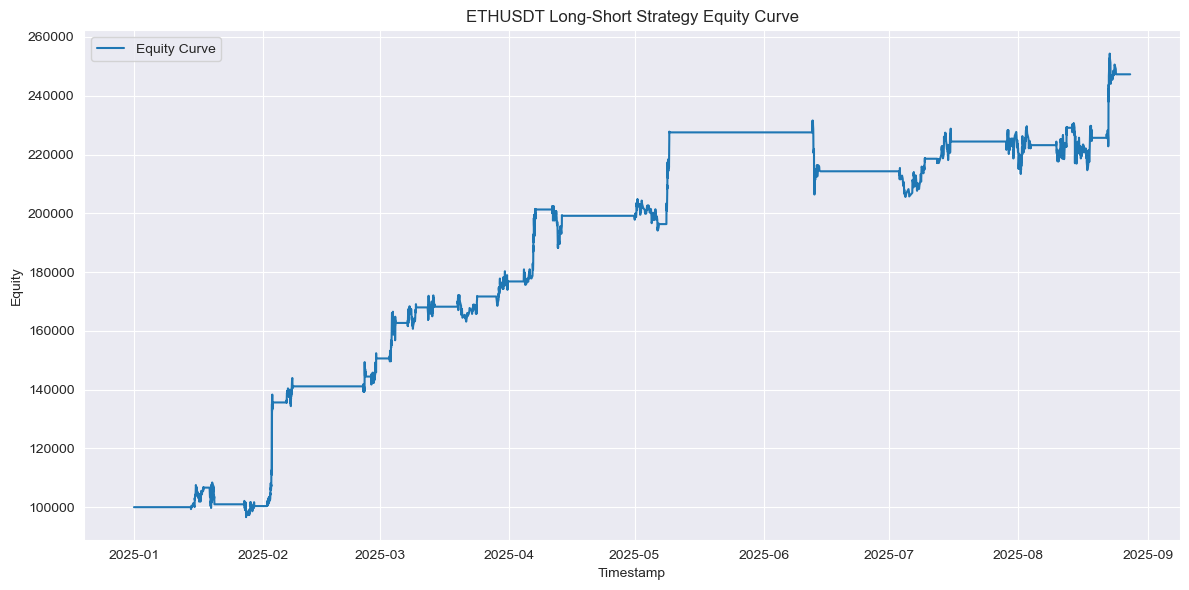

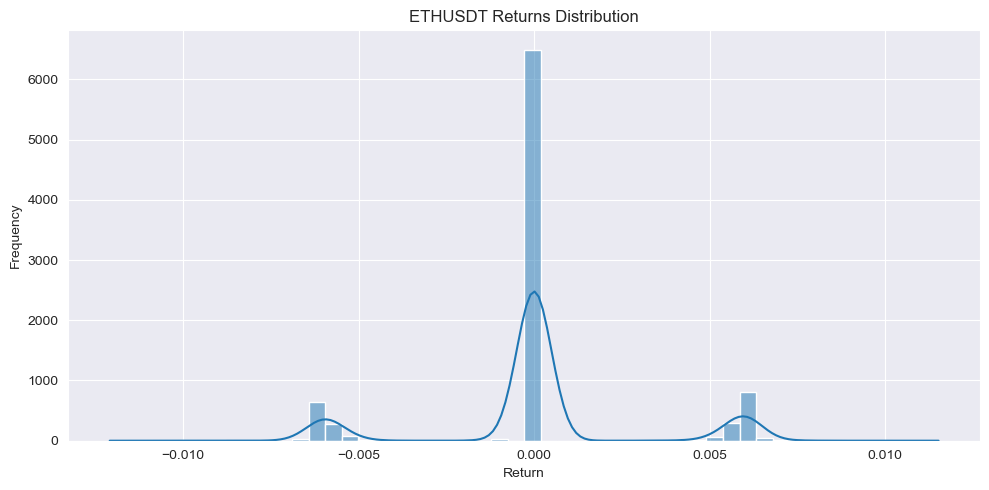

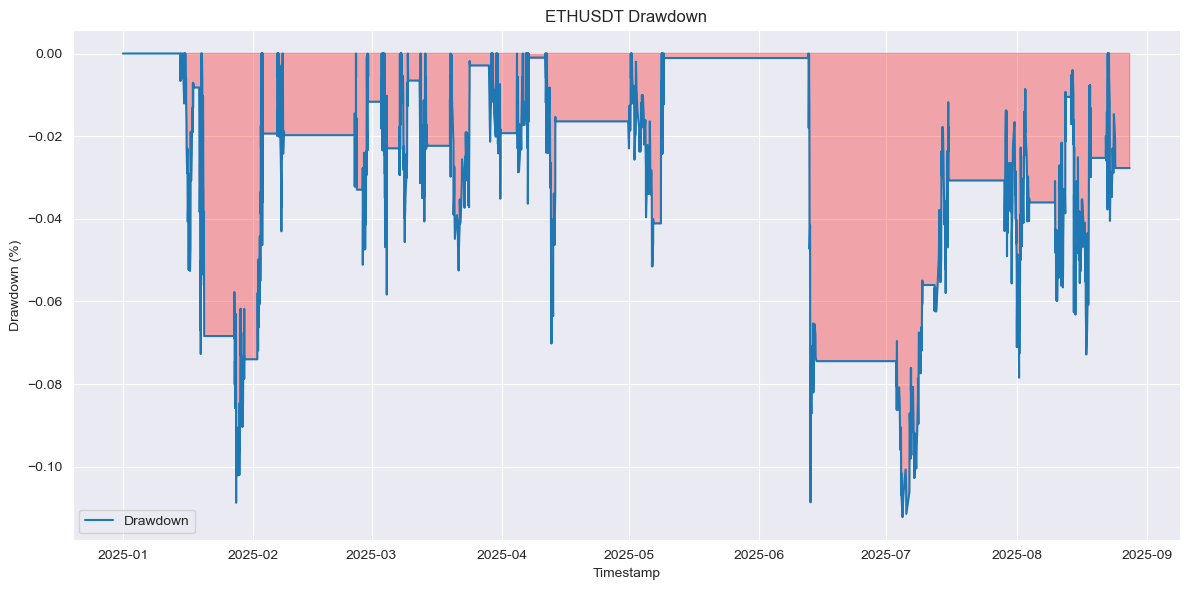

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

ma_window = int(feat_norm_rolling_mean_window)
print(ma_window)
# ma_window = 10

all_predictions_df = final_predictions_df
all_predictions_df['timestamp'] = pd.to_datetime(all_predictions_df['timestamp'], unit='us') # Assuming microseconds
all_predictions_df['ma'] = all_predictions_df['px'].rolling(window=ma_window).mean()

symbol_to_backtest = all_predictions_df['symbol'].iloc[0] # Take the first symbol for now
df = all_predictions_df[all_predictions_df['symbol'] == symbol_to_backtest].copy()
df = df.sort_values('timestamp').reset_index(drop=True)

# ===============================================
# Backtesting Parameters (Ratios for costs)
# ===============================================
initial_capital = 100000  # Initial capital
commission_ratio = 0.0005 # Commission ratio (e.0.05%)
slippage_ratio = 0.0007   # Slippage ratio (e.g., 0.02%)

trade_size_ratio = 0.9    # Percentage of current equity to allocate per trade

# Strategy Thresholds (needs optimization)
# long_threshold = 0.02 # Predicted probability above this to go long (buy)
# short_threshold = -0.02 # Predicted probability below this to go short (sell)
#
# beta = 3
# Dynamic Take Profit / Stop Loss (in multiples of rolling_std/px)
long_stop_loss_multiplier = beta
long_take_profit_multiplier = beta
short_stop_loss_multiplier = beta
short_take_profit_multiplier = beta

# ===============================================
# Backtesting Main Logic (No change here from previous version)
# ===============================================

# Initialize account state
capital = initial_capital
position = 0          # Position size (positive for long, negative for short, 0 for flat)
entry_price = 0       # Entry price for current position
realized_pnl = 0      # Realized PnL from closed trades
equity_curve = [initial_capital] # Equity curve
unrealized_pnl_series = [0]

# Record trades
trades = []

step = 0

for i in range(len(df)):
    current_time = df['timestamp'].iloc[i]
    current_px = df['px'].iloc[i]
    predicted_prob = df['predicted_prob_rolling_mean'].iloc[i]
    ma = df['ma'].iloc[i]
    current_rolling_std = current_px * 0.01
    # Calculate current total equity (capital + market value of position)
    if position > 0: # Long position
        unrealized_pnl = (current_px - entry_price) * position
    elif position < 0: # Short position
        unrealized_pnl = (entry_price - current_px) * abs(position) # Profit when price falls
    else: # Flat
        unrealized_pnl = 0

    current_equity = capital + unrealized_pnl
    equity_curve.append(current_equity)
    unrealized_pnl_series.append(unrealized_pnl)

    # -----------------------------------------------
    # Strategy Execution - Long-Short
    # -----------------------------------------------

    # Scenario 1: Currently FLAT (position == 0)
    if position == 0:
        if predicted_prob >= long_threshold and current_px > ma: # Go Long Signal
            trade_type = 'BUY_OPEN'
            trade_price = current_px * (1 + slippage_ratio)
            num_shares = (current_equity * trade_size_ratio) / (trade_price * (1 + commission_ratio))

            if num_shares > 0:
                position = num_shares
                entry_price = trade_price
                # capital -= (position * entry_price * (1 + commission_ratio))

                trades.append({
                    'timestamp': current_time, 'type': trade_type, 'price': entry_price, 'shares': position,
                    'capital_after_trade': capital, 'equity_after_trade': current_equity, 'predicted_prob': predicted_prob
                })
                print(f"{current_time}: {trade_type} {position:.2f} @ {entry_price:.2f} (Prob: {predicted_prob:.4f}) | Capital: {capital:.2f}")

        elif predicted_prob <= short_threshold and current_px < ma: # Go Short Signal
            trade_type = 'SELL_SHORT_OPEN'
            trade_price = current_px * (1 - slippage_ratio) # Price for short is lower (sell at market)
            num_shares = (current_equity * trade_size_ratio) / (trade_price * (1 + commission_ratio))

            if num_shares > 0:
                position = -num_shares # Negative for short position
                entry_price = trade_price
                # capital -= (abs(position) * entry_price * (1 + commission_ratio))

                trades.append({
                    'timestamp': current_time, 'type': trade_type, 'price': entry_price, 'shares': position,
                    'capital_after_trade': capital, 'equity_after_trade': current_equity, 'predicted_prob': predicted_prob
                })
                print(f"{current_time}: {trade_type} {position:.2f} @ {entry_price:.2f} (Prob: {predicted_prob:.4f}) | Capital: {capital:.2f}")

    # Scenario 2: Currently LONG (position > 0)
    elif position > 0:
        sl_price = entry_price - long_stop_loss_multiplier * current_rolling_std
        tp_price = entry_price + long_take_profit_multiplier * current_rolling_std

        should_close = False
        reason = ""

        step += 1
        
        if current_px <= sl_price:
            should_close = True
            reason = "Long Stop Loss Hit"
        elif current_px >= tp_price:
            should_close = True
            reason = "Long Take Profit Hit"

        if should_close or step > future_window:
            step = 0
            trade_type = 'SELL_CLOSE_LONG'
            close_price = current_px * (1 - slippage_ratio)
            gross_pnl_on_trade = (close_price - entry_price) * position
            net_pnl_on_trade = gross_pnl_on_trade - (close_price * position * commission_ratio)

            realized_pnl += net_pnl_on_trade
            capital += net_pnl_on_trade

            trades.append({
                'timestamp': current_time, 'type': trade_type, 'price': close_price, 'shares': position,
                'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': current_equity,
                'reason': reason, 'predicted_prob': predicted_prob
            })
            print(f"{current_time}: {trade_type} {position:.2f} @ {close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f} | Reason: {reason}")
            
            position = 0
            entry_price = 0


    # Scenario 3: Currently SHORT (position < 0)
    elif position < 0:
        sl_price = entry_price + long_stop_loss_multiplier * current_rolling_std
        tp_price = entry_price - long_take_profit_multiplier * current_rolling_std

        should_close = False
        reason = ""

        step += 1

        if current_px >= sl_price:
            should_close = True
            reason = "Short Stop Loss Hit"
        elif current_px <= tp_price:
            should_close = True
            reason = "Short Take Profit Hit"

        if should_close or step > future_window:
            step = 0

            trade_type = 'BUY_TO_COVER_SHORT'
            close_price = current_px * (1 + slippage_ratio)
            gross_pnl_on_trade = (entry_price - close_price) * abs(position)
            net_pnl_on_trade = gross_pnl_on_trade - (close_price * abs(position) * commission_ratio)

            realized_pnl += net_pnl_on_trade
            capital += net_pnl_on_trade

            trades.append({
                'timestamp': current_time, 'type': trade_type, 'price': close_price, 'shares': position,
                'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': current_equity,
                'reason': reason, 'predicted_prob': predicted_prob
            })
            print(f"{current_time}: {trade_type} {abs(position):.2f} @ {close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f} | Reason: {reason}")

            position = 0
            entry_price = 0

# Final close-out at the end of backtest if any position is open
final_equity_append_time = df['timestamp'].iloc[-1] + pd.Timedelta(seconds=1)
if position != 0:
    last_px = df['px'].iloc[-1]
    if position > 0: # Close long
        final_close_price = last_px * (1 - slippage_ratio)
        gross_pnl_on_trade = (final_close_price - entry_price) * position
        net_pnl_on_trade = gross_pnl_on_trade - (final_close_price * position * commission_ratio)
        # capital += (position * final_close_price * (1 - commission_ratio))
        trades.append({
            'timestamp': final_equity_append_time, 'type': 'SELL_FINAL_LONG', 'price': final_close_price, 'shares': position,
            'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': equity_curve[-1],
            'reason': 'End of Backtest', 'predicted_prob': df['predicted_value'].iloc[-1]
        })
        # print(f"End of Backtest: SELL_FINAL_LONG {position:.2f} @ {final_close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f}")
    else: # Close short
        final_close_price = last_px * (1 + slippage_ratio)
        gross_pnl_on_trade = (entry_price - final_close_price) * abs(position)
        net_pnl_on_trade = gross_pnl_on_trade - (final_close_price * abs(position) * commission_ratio)
        # capital += (abs(position) * entry_price * (1 - commission_ratio))
        trades.append({
            'timestamp': final_equity_append_time, 'type': 'BUY_FINAL_SHORT', 'price': final_close_price, 'shares': position,
            'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': equity_curve[-1],
            'reason': 'End of Backtest', 'predicted_prob': df['predicted_value'].iloc[-1]
        })
        # print(f"End of Backtest: BUY_FINAL_SHORT {abs(position):.2f} @ {final_close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f}")
    realized_pnl += net_pnl_on_trade
    position = 0

# Final equity curve update
equity_curve[-1] = capital
unrealized_pnl_series[-1] = 0
# ===============================================
# Performance Metrics Calculation (KEY CHANGES HERE)
# ===============================================
equity_series = pd.Series(equity_curve, index=df['timestamp'].tolist() + [final_equity_append_time])
returns = equity_series.pct_change().dropna()
unrealized_pnl_series = pd.Series(unrealized_pnl_series, index=equity_series.index)

# Total Return
total_return = (capital - initial_capital) / initial_capital

# Annualized Return - Based on Total Duration
annualized_return = total_return # Default value if not enough data

if len(df) > 1:
    # Get the total duration of the backtest data
    total_duration = df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]
    total_duration_seconds = total_duration.total_seconds()

    if total_duration_seconds > 0:
        # Number of seconds in a year
        seconds_in_year = 365 * 24 * 60 * 60

        # Annualization factor: (seconds in a year) / (total seconds in backtest)
        annualization_factor = seconds_in_year / total_duration_seconds

        # Apply annualization
        annualized_return = (1 + total_return)**annualization_factor - 1
    else:
        print("Warning: Total backtest duration is zero or invalid, cannot annualize return.")
else:
    print("Warning: Not enough data points to calculate total duration for annualization.")


# Max Drawdown
peak = equity_series.expanding(min_periods=1).max()
drawdown = (equity_series - peak) / peak
max_drawdown = drawdown.min()

# Sharpe Ratio (assuming risk-free rate is 0)
# For volatility, we use returns.std() and annualize it with the same factor
annualized_volatility = returns.std() * np.sqrt(annualization_factor) if 'annualization_factor' in locals() and annualization_factor > 0 else returns.std()
sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan

# Win Rate for closed trades
if len(trades) > 0:
    winning_trades = sum(1 for t in trades if 'pnl' in t and t['pnl'] > 0)
    total_closed_trades = sum(1 for t in trades if 'pnl' in t)
    win_rate = winning_trades / total_closed_trades if total_closed_trades > 0 else 0
else:
    win_rate = 0


print("\n" + "="*60)
print("Backtesting Results Summary (Long-Short Strategy):")
print(f"Initial Capital: {initial_capital:.2f}")
print(f"Final Capital: {capital:.2f}")
print(f"Total Return: {total_return:.2%}")
print(f"Total Realized PnL: {realized_pnl:.2f}")
print(f"Âπ¥ÂåñÊî∂Áõä (Ëøë‰ºº): {annualized_return:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio (Risk-Free Rate = 0): {sharpe_ratio:.2f}")
print(f"Number of Trades: {len(trades)}")
print(f"Win Rate: {win_rate:.2%}")
print("="*60)
print("ma")

# ===============================================
# Plotting
# ===============================================

# Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(equity_series.index, equity_series, label='Equity Curve')
plt.title(f'{symbol_to_backtest} Long-Short Strategy Equity Curve')
plt.xlabel('Timestamp')
plt.ylabel('Equity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Returns Distribution
if not returns.empty:
    plt.figure(figsize=(10, 5))
    sns.histplot(returns, kde=True, bins=50)
    plt.title(f'{symbol_to_backtest} Returns Distribution')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Drawdown Plot
if not drawdown.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(drawdown.index, drawdown, label='Drawdown')
    plt.fill_between(drawdown.index, drawdown, 0, where=(drawdown < 0), color='red', alpha=0.3)
    plt.title(f'{symbol_to_backtest} Drawdown')
    plt.xlabel('Timestamp')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# plt.figure(figsize=(12, 6))
# plt.plot(unrealized_pnl_series.index, unrealized_pnl_series, label="Unrealized PnL")
# plt.axhline(0, color='gray', linestyle='--')
# plt.title(f"{symbol_to_backtest} ÊµÆÂä®Áõà‰∫è (Unrealized PnL)")
# plt.xlabel("Timestamp")
# plt.ylabel("Unrealized PnL")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


In [69]:
import os
import json
import pickle
from pathlib import Path
from datetime import datetime

def save_tabnet_checkpoint(
    model,
    symbol,
    base_save_dir: str,
    model_params: dict,
    feature_names: list[str],
    training_meta: dict,
    unique_id: str = None, 
):
    if unique_id is None:
        timestamp = str(datetime.now().strftime("%Y-%m-%d_%H-%M"))
        save_dir = os.path.join(base_save_dir, f"{symbol}_{timestamp}")
    else:
        save_dir = os.path.join(base_save_dir, f"{symbol}_{unique_id}")

    os.makedirs(save_dir, exist_ok=True)

    model_path = os.path.join(save_dir, "tabnet_model")
    model.save_model(model_path)

    config_path = os.path.join(save_dir, "model_metadata.json")
    with open(config_path, "w") as f:
        json.dump({
            "model_params": model_params,
            "meta_info": training_meta,
        }, f, indent=4)

    aux_path = os.path.join(save_dir, "auxiliary.pkl")
    with open(aux_path, "wb") as f:
        pickle.dump({
            "feature_names": feature_names,
        }, f)

    print(f"model and meta info saved to {save_dir}")


In [70]:
# print(len(feature_cols))
# results = []
# all_tab_inc_test_predictions = []
# all_tabnet_test_predictions = []
# all_lgb_test_predictions = []
#
# lgb_model = None
# tab_inc = None
# tab_inc_flag = 0
#
# train_dfs = split_dataframes[-n_train_terms:]
#
# train_df = pl.concat(train_dfs)
#
# train_df_processed = train_df.sort('timestamp').drop_nulls(subset=feature_cols + [target_col, 'px']).to_pandas()
# X_train = train_df_processed[feature_cols]
# y_train = train_df_processed[target_col]
# px_train = train_df_processed['px']
#
#
# tabnet = TabNetRegressor(**params)
# tabnet.fit(
#     X_train=X_train.values,
#     y_train=y_train.values.reshape(-1, 1),
#     **init_fit_params,
# )
# print("1")

In [71]:
# save_tabnet_checkpoint(
#     model=tabnet,
#     symbol=symbol,
#     base_save_dir="./saved_models/tabnet_inc_regressor",
#     model_params=params,
#     feature_names=X_train.columns,
#     training_meta={
#         "symbol": symbol,
#         "train_n_terms": n_train_terms,
#         "init_fit_params": init_fit_params,
#         "label_window": future_window,
#         "fit_start_date": overall_start,
#         "fit_end_date": overall_end,
#         "saved_timestamp": str(pd.Timestamp.now()),
#         "feat_cal_window": int(feat_cal_window),
#         "feat_norm_window": feat_norm_window,
#         "feat_norm_rolling_mean_window": feat_norm_rolling_mean_window,
#         "bt_up_thresh": long_threshold,
#         "bt_dn_thresh": short_threshold,
#         "bt_ma_window": ma_window,
#         "bt_beta": beta,
#         "bt_ret": total_return,
#         "bt_dd": max_drawdown,
#         "bt_n_trade": len(trades),
#     },
# )